# Подключаем библиотеки

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix
import math
from IPython.core.display import Image, display
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline
pylab.rcParams['figure.figsize'] = (7, 7)
import time

In [2]:
# сброс ограничений на число выводимых столбцов
pd.set_option('display.max_columns', None)

In [3]:
# подключаем гугл диск
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import warnings
warnings.filterwarnings("ignore")

# Анализ и подготовка данных

In [133]:
# Читаем наборы данных для обучения и тестирования
train = pd.read_csv('/content/drive/MyDrive/DS_healthcare_21/Training.csv')
test = pd.read_csv('/content/drive/MyDrive/DS_healthcare_21/Testing.csv')

In [6]:
# Посмотрим на первые пять строк обучающего набора
train.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       0           0             0        0                 0   
2       0           0             0        0                 0   
3       0           0             0        0                 0   
4       0           0             0        0                 0   

   muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0               0         0                    0                    0   
1               0         0                    0                    0   
2               0         0                    0                    0   
3               0         0                    0                    0   
4               0         0                    0                    0   

   fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
0        0            0        0                     0            0   
1        0            0        0                     0            0   
2        0            0        0                     0            0   
3        0            0        0                     0            0   
4        0            0        0                     0            0   

   weight_loss  restlessness  lethargy  patches_in_throat  \
0            0             0         0                  0   
1            0             0         0                  0   
2            0             0         0                  0   
3            0             0         0                  0   
4            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      0           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               0           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       0                 0                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               0          0           0             0                  0   
4               0          0           0             0                  0   

   acute_liver_failure  fluid_over

In [7]:
# Проверяем форму обучающего набора
train.shape

(4920, 134)

In [8]:
train.describe()

itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       0.000000     0.000000     0.000000      0.000000     0.000000   
75%       0.000000     0.000000     0.000000      0.000000     0.000000   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

       ulcers_on_tongue  muscle_wasting     vomiting  burning_micturition  \
count       4920.000000     4920.000000  4920.000000          4920.000000   
mean           0.021951        0.021951     0.389024             0.043902   
std            0.146539        0.146539     0.487578             0.204899   
min            0.000000        0.000000     0.000000             0.000000   
25%            0.000000        0.000000     0.000000             0.000000   
50%            0.000000        0.000000     0.000000             0.000000   
75%            0.000000        0.000000     1.000000             0.000000   
max            1.000000        1.000000     1.000000             1.000000   

       spotting_ urination      fatigue  weight_gain      anxiety  \
count          4920.000000  4920.000000  4920.000000  4920.000000   
mean              0.021951     0.392683     0.023171     0.023171   
std               0.146539     0.488397     0.150461     0.150461   
min               0.000000     0.000000     0.000000     0.000000   
25%               0.000000     0.000000     0.000000     0.000000   
50%               0.000000     0.000000     0.000000     0.000000   
75%               0.000000     1.000000     0.000000     0.000000   
max               1.000000     1.000000     1.000000     1.000000   

       cold_hands_and_feets  mood_swings  weight_loss  restlessness  \
count           4920.000000  4920.000000  4920.000000   4920.000000   
mean               0.023171     0.046341     0.092683      0.046341   
std                0.150461     0.210245     0.290017      0.210245   
min                0.000000     0.000000     0.000000      0.000000   
25%                0.000000     0.000000     0.000000      0.000000   
50%                0.000000     0.000000     0.000000      0.000000   
75%                0.000000     0.000000     0.000000      0.000000   
max                1.000000     1.000000     1.000000      1.000000   

          lethargy  patches_in_throat  irregular_sugar_level        cough  \
count  4920.000000        4920.000000            4920.000000  4920.000000   
mean      0.092683           0.021951               0.023171     0.114634   
std       0.290017           0.146539               0.150461     0.318612   
min       0.000000           0.000000               0.000000     0.000000   
25%       0.000000           0.000000               0.000000     0.000000   
50%       0.000000           0.000000               0.000000     0.000000   
75%       0.000000           0.000000               0.000000     0.000000   
max       1.000000           1.000000               1.000000

In [9]:
train.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [10]:
# Посмотрим на первые пять строк тестового набора
test.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       1           0             0        0                 0   
2       0           0             1        1                 1   
3       0           0             0        0                 0   
4       0           0             1        0                 0   

   muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0               0         0                    0                    0   
1               0         0                    0                    0   
2               0         1                    0                    0   
3               0         1                    0                    0   
4               0         0                    1                    1   

   fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
0        0            0        0                     0            0   
1        0            0        0                     0            0   
2        0            0        0                     0            0   
3        0            0        0                     0            0   
4        0            0        0                     0            0   

   weight_loss  restlessness  lethargy  patches_in_throat  \
0            0             0         0                  0   
1            0             0         0                  0   
2            0             0         0                  0   
3            0             0         0                  0   
4            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      1           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               1           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       1                 1                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               1          0           0             0                  1   
4               0          0           0             0                  0   

   acute_liver_failure  fluid_over

In [11]:
# Проверяем форму тестового набора
test.shape

(42, 133)

In [134]:
# Т.к. в обучающем наборе на один столбец больше, и он явно не содержит информацию, удалим его. Также сделаем копию обучающего набора
train_c = train.copy()
train_c.drop('Unnamed: 133', axis=1, inplace=True)

In [13]:
train_c.shape

(4920, 133)

In [135]:
# DataFrame только с симптомами
X = train_c.drop('prognosis', axis=1)

In [15]:
# Подсчитаем, сколько единиц в каждом столбце. Наиболее популярный симптом 'fatigue', наименее популярный - 'foul_smell_of urine.
X.sum().sort_values(ascending=False)

fatigue                   1932
vomiting                  1914
high_fever                1362
loss_of_appetite          1152
nausea                    1146
                          ... 
extra_marital_contacts     108
swollen_blood_vessels      108
sunken_eyes                108
foul_smell_of urine        102
fluid_overload               0
Length: 132, dtype: int64

In [136]:
# Симптом 'fluid_overload' ни по одному из диагнозов не отмечен. Удалим его из датасета
train_c = train_c.drop('fluid_overload', axis=1)

In [137]:
X.drop('fluid_overload', axis=1, inplace=True)

In [18]:
table = X[['fatigue', 'foul_smell_of urine']].sum()

In [19]:
table

fatigue                1932
foul_smell_of urine     102
dtype: int64

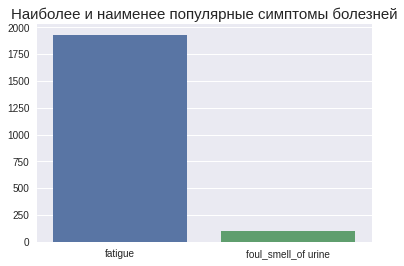

In [20]:
sns.barplot(x=table.index, y=table.values).set_title('Наиболее и наименее популярные симптомы болезней', fontsize=15)
plt.show()

In [21]:
# Создадим сводную таблицу болезней с симптомами
table_2 = train_c.groupby('prognosis').aggregate(sum)
table_2

itching  skin_rash  \
prognosis                                                     
(vertigo) Paroymsal  Positional Vertigo        0          0   
AIDS                                           0          0   
Acne                                           0        114   
Alcoholic hepatitis                            0          0   
Allergy                                        0          0   
Arthritis                                      0          0   
Bronchial Asthma                               0          0   
Cervical spondylosis                           0          0   
Chicken pox                                  114        114   
Chronic cholestasis                          114          0   
Common Cold                                    0          0   
Dengue                                         0        114   
Diabetes                                       0          0   
Dimorphic hemmorhoids(piles)                   0          0   
Drug Reaction                                114        108   
Fungal infection                             108        108   
GERD                                           0          0   
Gastroenteritis                                0          0   
Heart attack                                   0          0   
Hepatitis B                                  114          0   
Hepatitis C                                    0          0   
Hepatitis D                                    0          0   
Hepatitis E                                    0          0   
Hypertension                                   0          0   
Hyperthyroidism                                0          0   
Hypoglycemia                                   0          0   
Hypothyroidism                                 0          0   
Impetigo                                       0        114   
Jaundice                                     114          0   
Malaria                                        0          0   
Migraine                                       0          0   
Osteoarthristis                                0          0   
Paralysis (brain hemorrhage)                   0          0   
Peptic ulcer diseae                            0          0   
Pneumonia                                      0          0   
Psoriasis                                      0        114   
Tuberculosis                                   0          0   
Typhoid                                        0          0   
Urinary tract infection                        0          0   
Varicose veins                                 0          0   
hepatitis A                                    0          0   

                                         nodal_skin_eruptions  \
prognosis                                                       
(vertigo) Paroymsal  Positional Vertigo                     0   
AIDS                                                        0   
Acne                                                        0   
Alcoholic hepatitis                                         0   
Allergy                                                     0   
Arthritis                                                   0   
Bronchial Asthma                                            0   
Cervical spondylosis                                        0   
Chicken pox                                                 0   
Chronic cholestasis                                         0   
Common Cold                                                 0   
Dengue                                                      0   
Diabetes                                                    0   
Dimorphic hemmorhoids(piles)                                0   
Drug Reaction                                               0   
Fungal infection                                          108   
GERD                                                        0   
Gastroenteritis                                             0   
Heart attack                   

In [22]:
# Функция получения списка симптомов болезни, самого популярного симптома и списка симптомов, которые никогда не возникают
def get_symptoms(tab, line):
    symptoms = []
    freq = []
    non_symptoms = []
    for col in list(tab.columns):
        if tab[col][line] > 0:
            symptoms.append(col)
            freq.append(tab[col][line])
        else:
            non_symptoms.append(col)
    popular = symptoms[freq.index(max(freq))]
    return symptoms, popular, non_symptoms

In [23]:
# Функция печати содержимого list без квадратных скобок
def print_list(my_list):
    print(', '.join(my_list))

In [24]:
# Для каждого заболевания посмотрим симптомы, наиболее часто встречающийся симптом и симптомы, которые никогда не возникают
for dis in list(table_2.index):
    symptoms, popular, non_symptoms = get_symptoms(table_2, dis)
    print(f'\nСимптомы {dis}:')
    print_list(symptoms)
    print(f'Симптом, который встречается чаще всего: {popular}')
    print('Симптомы, которые никогда не возникают при этой болезни: ')
    print_list(non_symptoms)     
            


Симптомы (vertigo) Paroymsal  Positional Vertigo:
vomiting, headache, nausea, spinning_movements, loss_of_balance, unsteadiness
Симптом, который встречается чаще всего: vomiting
Симптомы, которые никогда не возникают при этой болезни: 
itching, skin_rash, nodal_skin_eruptions, continuous_sneezing, shivering, chills, joint_pain, stomach_pain, acidity, ulcers_on_tongue, muscle_wasting, burning_micturition, spotting_ urination, fatigue, weight_gain, anxiety, cold_hands_and_feets, mood_swings, weight_loss, restlessness, lethargy, patches_in_throat, irregular_sugar_level, cough, high_fever, sunken_eyes, breathlessness, sweating, dehydration, indigestion, yellowish_skin, dark_urine, loss_of_appetite, pain_behind_the_eyes, back_pain, constipation, abdominal_pain, diarrhoea, mild_fever, yellow_urine, yellowing_of_eyes, acute_liver_failure, swelling_of_stomach, swelled_lymph_nodes, malaise, blurred_and_distorted_vision, phlegm, throat_irritation, redness_of_eyes, sinus_pressure, runny_nose, co

In [25]:
# Рассчитаем числовые характеристики распределения для каждого симптома: среднее значение, медиана, стандартное отклонение, дисперсия
table_2.describe()

itching   skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count   41.000000   41.000000             41.000000            41.000000   
mean    16.536585   19.170732              2.634146             5.414634   
std     40.445085   42.790129             16.866766            24.216705   
min      0.000000    0.000000              0.000000             0.000000   
25%      0.000000    0.000000              0.000000             0.000000   
50%      0.000000    0.000000              0.000000             0.000000   
75%      0.000000    0.000000              0.000000             0.000000   
max    114.000000  114.000000            108.000000           114.000000   

        shivering      chills  joint_pain  stomach_pain     acidity  \
count   41.000000   41.000000   41.000000     41.000000   41.000000   
mean     2.634146   19.463415   16.682927      5.414634    5.414634   
std     16.866766   43.448877   40.793651     24.216705   24.216705   
min      0.000000    0.000000    0.000000      0.000000    0.000000   
25%      0.000000    0.000000    0.000000      0.000000    0.000000   
50%      0.000000    0.000000    0.000000      0.000000    0.000000   
75%      0.000000    0.000000    0.000000      0.000000    0.000000   
max    108.000000  120.000000  114.000000    114.000000  114.000000   

       ulcers_on_tongue  muscle_wasting    vomiting  burning_micturition  \
count         41.000000       41.000000   41.000000            41.000000   
mean           2.634146        2.634146   46.682927             5.268293   
std           16.866766       16.866766   56.181153            23.553157   
min            0.000000        0.000000    0.000000             0.000000   
25%            0.000000        0.000000    0.000000             0.000000   
50%            0.000000        0.000000    0.000000             0.000000   
75%            0.000000        0.000000  114.000000             0.000000   
max          108.000000      108.000000  114.000000           108.000000   

       spotting_ urination     fatigue  weight_gain     anxiety  \
count            41.000000   41.000000    41.000000   41.000000   
mean              2.634146   47.121951     2.780488    2.780488   
std              16.866766   56.708110    17.803809   17.803809   
min               0.000000    0.000000     0.000000    0.000000   
25%               0.000000    0.000000     0.000000    0.000000   
50%               0.000000    0.000000     0.000000    0.000000   
75%               0.000000  114.000000     0.000000    0.000000   
max             108.000000  120.000000   114.000000  114.000000   

       cold_hands_and_feets  mood_swings  weight_loss  restlessness  \
count             41.000000    41.000000    41.000000     41.000000   
mean               2.780488     5.560976    11.121951      5.560976   
std               17.803809    24.861666    34.246310     24.861666   
min                0.000000     0.000000     0.000000      0.000000   
25%                0.000000     0.000000     0.000000      0.000000   
50%                0.000000     0.000000     0.000000      0.000000   
75%                0.000000     0.000000     0.000000      0.000000   
max              114.000000   114.000000   114.000000    114.000000   

         lethargy  patches_in_throat  irregular_sugar_level       cough  \
count   41.000000          41.000000              41.000000   41.000000   
mean    11.121951           2.634146               2.780488   13.756098   
std     34.246310          16.866766              17.803809   37.379661   
min      0.000000           0.000000               0.000000    0.000000   
25%      0.000000           0.000000               0.000000    0.000000   
50%      0.000000           0.000000               0.000000    0.000000   
75%      0.000000           0.000000               0.000000    0.000000   
max    114.000000         108.000000             114.000000  114.000000   

       high_fever  sunken_eyes  breathlessness    sweating  dehydration  \
count

In [26]:
# Посмотрим, сколько записей каждой болезни в обучающем наборе
# по 120 записей
train_c.groupby('prognosis').count()

itching  skin_rash  \
prognosis                                                     
(vertigo) Paroymsal  Positional Vertigo      120        120   
AIDS                                         120        120   
Acne                                         120        120   
Alcoholic hepatitis                          120        120   
Allergy                                      120        120   
Arthritis                                    120        120   
Bronchial Asthma                             120        120   
Cervical spondylosis                         120        120   
Chicken pox                                  120        120   
Chronic cholestasis                          120        120   
Common Cold                                  120        120   
Dengue                                       120        120   
Diabetes                                     120        120   
Dimorphic hemmorhoids(piles)                 120        120   
Drug Reaction                                120        120   
Fungal infection                             120        120   
GERD                                         120        120   
Gastroenteritis                              120        120   
Heart attack                                 120        120   
Hepatitis B                                  120        120   
Hepatitis C                                  120        120   
Hepatitis D                                  120        120   
Hepatitis E                                  120        120   
Hypertension                                 120        120   
Hyperthyroidism                              120        120   
Hypoglycemia                                 120        120   
Hypothyroidism                               120        120   
Impetigo                                     120        120   
Jaundice                                     120        120   
Malaria                                      120        120   
Migraine                                     120        120   
Osteoarthristis                              120        120   
Paralysis (brain hemorrhage)                 120        120   
Peptic ulcer diseae                          120        120   
Pneumonia                                    120        120   
Psoriasis                                    120        120   
Tuberculosis                                 120        120   
Typhoid                                      120        120   
Urinary tract infection                      120        120   
Varicose veins                               120        120   
hepatitis A                                  120        120   

                                         nodal_skin_eruptions  \
prognosis                                                       
(vertigo) Paroymsal  Positional Vertigo                   120   
AIDS                                                      120   
Acne                                                      120   
Alcoholic hepatitis                                       120   
Allergy                                                   120   
Arthritis                                                 120   
Bronchial Asthma                                          120   
Cervical spondylosis                                      120   
Chicken pox                                               120   
Chronic cholestasis                                       120   
Common Cold                                               120   
Dengue                                                    120   
Diabetes                                                  120   
Dimorphic hemmorhoids(piles)                              120   
Drug Reaction                                             120   
Fungal infection                                          120   
GERD                                                      120   
Gastroenteritis                                           120   
Heart attack                   

In [27]:
# Посмотрим, сколько записей каждой болезни в тестовом наборе
# по одной, кроме 'Fungal infection', которой две записи
test.groupby('prognosis').count()

itching  skin_rash  \
prognosis                                                     
(vertigo) Paroymsal  Positional Vertigo        1          1   
AIDS                                           1          1   
Acne                                           1          1   
Alcoholic hepatitis                            1          1   
Allergy                                        1          1   
Arthritis                                      1          1   
Bronchial Asthma                               1          1   
Cervical spondylosis                           1          1   
Chicken pox                                    1          1   
Chronic cholestasis                            1          1   
Common Cold                                    1          1   
Dengue                                         1          1   
Diabetes                                       1          1   
Dimorphic hemmorhoids(piles)                   1          1   
Drug Reaction                                  1          1   
Fungal infection                               2          2   
GERD                                           1          1   
Gastroenteritis                                1          1   
Heart attack                                   1          1   
Hepatitis B                                    1          1   
Hepatitis C                                    1          1   
Hepatitis D                                    1          1   
Hepatitis E                                    1          1   
Hypertension                                   1          1   
Hyperthyroidism                                1          1   
Hypoglycemia                                   1          1   
Hypothyroidism                                 1          1   
Impetigo                                       1          1   
Jaundice                                       1          1   
Malaria                                        1          1   
Migraine                                       1          1   
Osteoarthristis                                1          1   
Paralysis (brain hemorrhage)                   1          1   
Peptic ulcer diseae                            1          1   
Pneumonia                                      1          1   
Psoriasis                                      1          1   
Tuberculosis                                   1          1   
Typhoid                                        1          1   
Urinary tract infection                        1          1   
Varicose veins                                 1          1   
hepatitis A                                    1          1   

                                         nodal_skin_eruptions  \
prognosis                                                       
(vertigo) Paroymsal  Positional Vertigo                     1   
AIDS                                                        1   
Acne                                                        1   
Alcoholic hepatitis                                         1   
Allergy                                                     1   
Arthritis                                                   1   
Bronchial Asthma                                            1   
Cervical spondylosis                                        1   
Chicken pox                                                 1   
Chronic cholestasis                                         1   
Common Cold                                                 1   
Dengue                                                      1   
Diabetes                                                    1   
Dimorphic hemmorhoids(piles)                                1   
Drug Reaction                                               1   
Fungal infection                                            2   
GERD                                                        1   
Gastroenteritis                                             1   
Heart attack                   

In [28]:
# Функция получения списка % симптомов в описании болезни, количества симптомов у каждой болезни
def get_coeff(tab, line):
    symptoms = []
    freq = []
    non_symptoms = []
    for col in list(tab.columns):
        if tab[col][line] > 0:
            symptoms.append(col)
            freq.append(tab[col][line])
        else:
            non_symptoms.append(col)
    coeff = round(len(symptoms)/131*100, 2)
    
    return coeff, sum(freq), len(symptoms), len(non_symptoms)

In [29]:
# Для каждого заболевания посмотрим % симптомов в описании (от общего количества симптомов)
dis_list = []
coeff_list = []
freq_list = []
for dis in list(table_2.index):
    coeff, sum_freq, n_symptoms, n_non_symptoms = get_coeff(table_2, dis)
    dis_list.append(dis)
    coeff_list.append(coeff) # в процентах от общего кол-ва симптомов, т.е. независимо от того в скольких записях встречается симптом, учитывается один раз по болезни
    freq_list.append(sum_freq) # абсолютное количество симптомов по всем записям болезни 
    # print(f'\n{dis}: количество симптомов: {n_symptoms}, не возникает {n_non_symptoms}')
    # print(f'Процент симптомов {coeff} %')

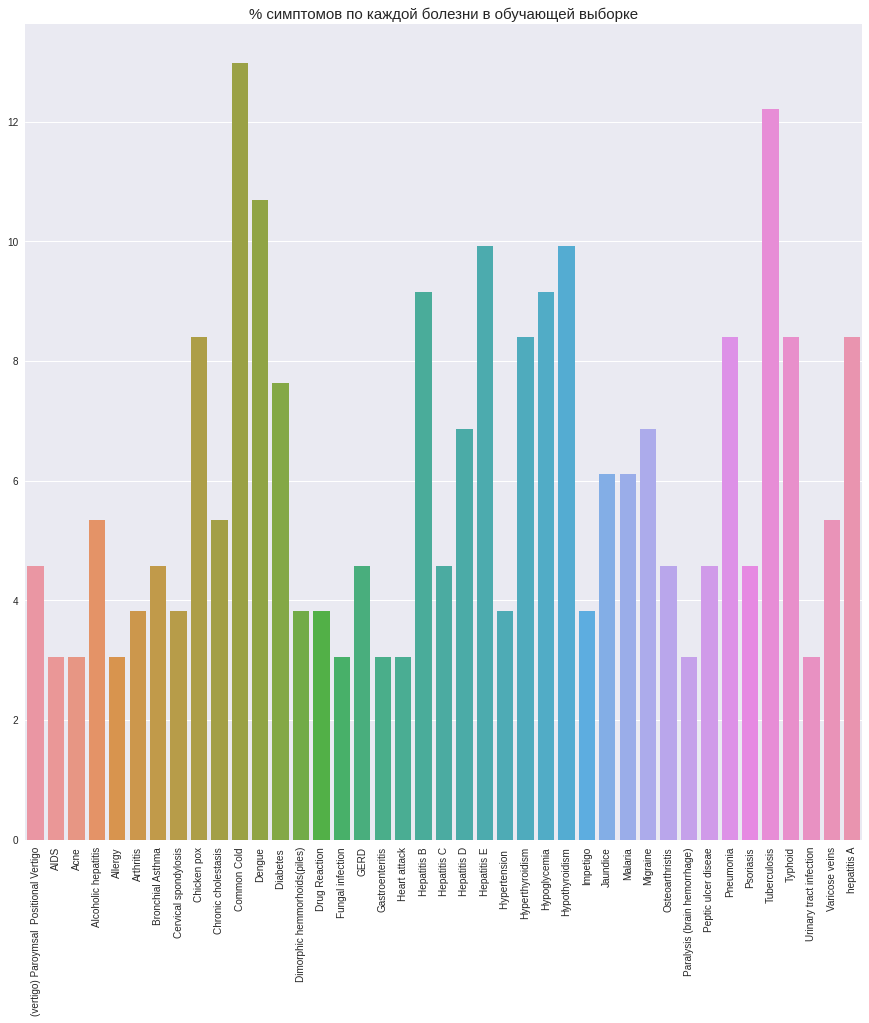

In [30]:
pylab.rcParams['figure.figsize'] = (15, 15)
sns.barplot(x=dis_list, y=coeff_list).set_title('% симптомов по каждой болезни в обучающей выборке', fontsize=15)
plt.xticks(rotation=90)
plt.show()

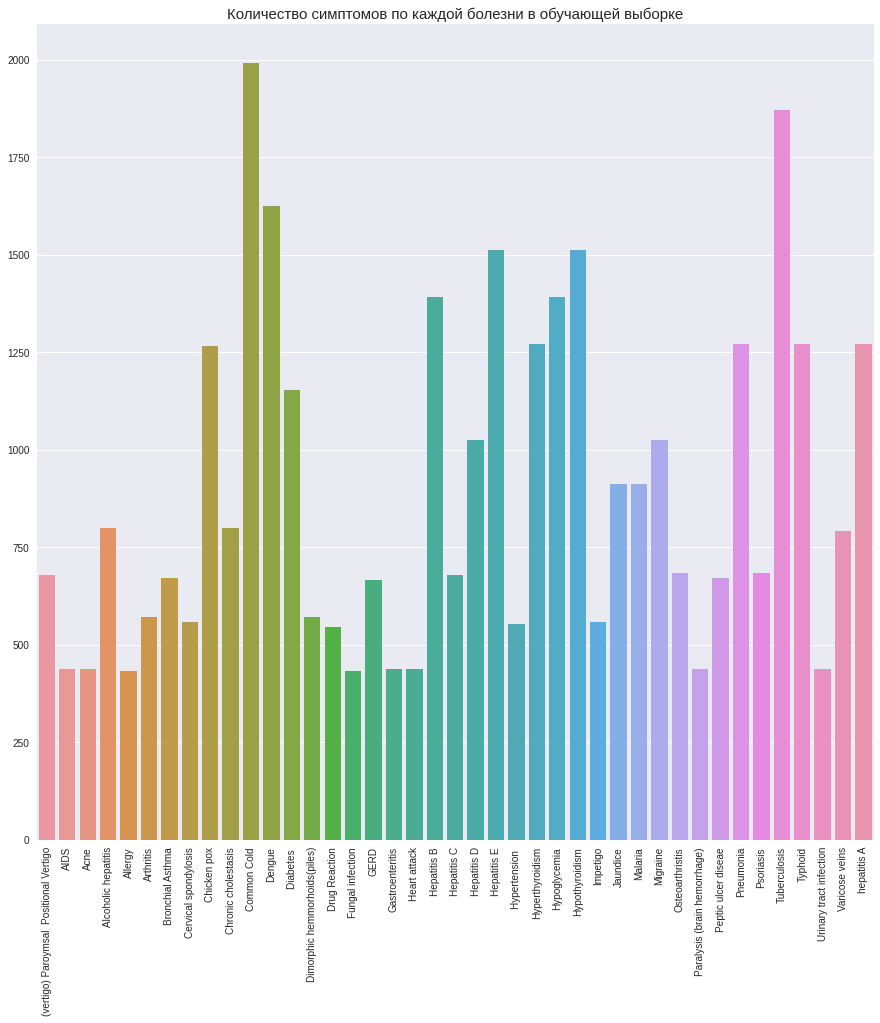

In [31]:
# pylab.rcParams['figure.figsize'] = (15, 15)
sns.barplot(x=dis_list, y=freq_list).set_title('Количество симптомов по каждой болезни в обучающей выборке', fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [32]:
# Создадим сводную таблицу болезней с симптомами (тестовая выборка)
table_test = test.groupby('prognosis').aggregate(sum)
table_test

itching  skin_rash  \
prognosis                                                     
(vertigo) Paroymsal  Positional Vertigo        0          0   
AIDS                                           0          0   
Acne                                           0          1   
Alcoholic hepatitis                            0          0   
Allergy                                        0          0   
Arthritis                                      0          0   
Bronchial Asthma                               0          0   
Cervical spondylosis                           0          0   
Chicken pox                                    1          1   
Chronic cholestasis                            1          0   
Common Cold                                    0          0   
Dengue                                         0          1   
Diabetes                                       0          0   
Dimorphic hemmorhoids(piles)                   0          0   
Drug Reaction                                  1          1   
Fungal infection                               2          2   
GERD                                           0          0   
Gastroenteritis                                0          0   
Heart attack                                   0          0   
Hepatitis B                                    1          0   
Hepatitis C                                    0          0   
Hepatitis D                                    0          0   
Hepatitis E                                    0          0   
Hypertension                                   0          0   
Hyperthyroidism                                0          0   
Hypoglycemia                                   0          0   
Hypothyroidism                                 0          0   
Impetigo                                       0          1   
Jaundice                                       1          0   
Malaria                                        0          0   
Migraine                                       0          0   
Osteoarthristis                                0          0   
Paralysis (brain hemorrhage)                   0          0   
Peptic ulcer diseae                            0          0   
Pneumonia                                      0          0   
Psoriasis                                      0          1   
Tuberculosis                                   0          0   
Typhoid                                        0          0   
Urinary tract infection                        0          0   
Varicose veins                                 0          0   
hepatitis A                                    0          0   

                                         nodal_skin_eruptions  \
prognosis                                                       
(vertigo) Paroymsal  Positional Vertigo                     0   
AIDS                                                        0   
Acne                                                        0   
Alcoholic hepatitis                                         0   
Allergy                                                     0   
Arthritis                                                   0   
Bronchial Asthma                                            0   
Cervical spondylosis                                        0   
Chicken pox                                                 0   
Chronic cholestasis                                         0   
Common Cold                                                 0   
Dengue                                                      0   
Diabetes                                                    0   
Dimorphic hemmorhoids(piles)                                0   
Drug Reaction                                               0   
Fungal infection                                            1   
GERD                                                        0   
Gastroenteritis                                             0   
Heart attack                   

In [33]:
# Для каждого заболевания посмотрим % симптомов в описании (от общего количества симптомов)
dis_test_list = []
coeff_test_list = []
freq_test_list = []
for dis in list(table_test.index):
    coeff_t, sum_freq_t, n_symptoms_t, n_non_symptoms_t = get_coeff(table_2, dis)
    dis_test_list.append(dis)
    coeff_test_list.append(coeff_t)
    freq_test_list.append(sum_freq_t)
    # print(f'\n{dis}: количество симптомов: {n_symptoms_t}, не возникает {n_non_symptoms_t}')
    # print(f'Процент симптомов {coeff_t} %')

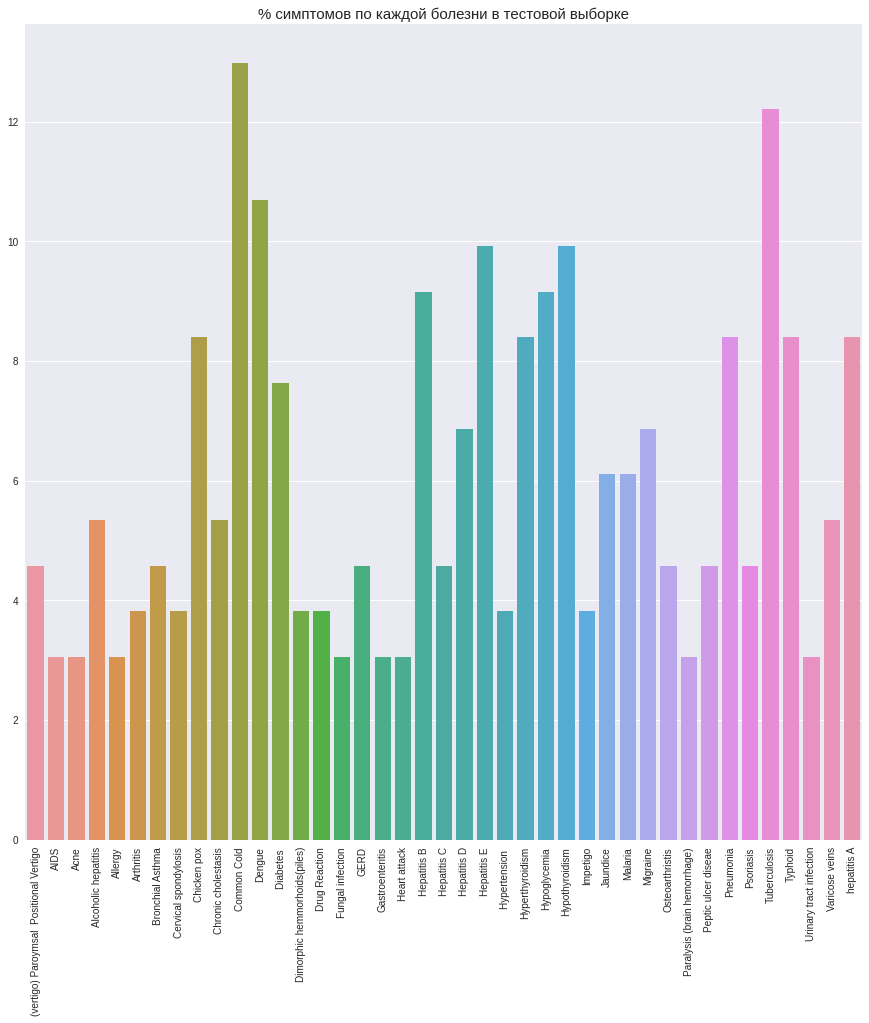

In [34]:
# pylab.rcParams['figure.figsize'] = (15, 15)
sns.barplot(x=dis_test_list, y=coeff_test_list).set_title('% симптомов по каждой болезни в тестовой выборке', fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [138]:
# DataFrame тестовой выборки только с симптомами
X_testing = test.drop('prognosis', axis=1)

In [36]:
# Подсчитаем, сколько единиц в каждом столбце.
X_testing.sum().sort_values(ascending=False)

vomiting                    17
fatigue                     17
high_fever                  12
loss_of_appetite            10
nausea                      10
                            ..
foul_smell_of urine          1
continuous_feel_of_urine     1
passage_of_gases             1
cramps                       1
fluid_overload               0
Length: 132, dtype: int64

In [139]:
# Симптом 'fluid_overload' ни по одному из диагнозов в тестовой выборке также не отмечен. Удалим его из датасета
test_c = test.drop('fluid_overload', axis=1)

In [140]:
# Отделим целевой столбец (с диагнозами) от симптомов
Y = train_c['prognosis']

In [39]:
Y.shape

(4920,)

In [141]:
#  и выполним его кодирование
Y_cat_encoded, Y_categories = Y.factorize()
encoder = OneHotEncoder()
Y_OHE = encoder.fit_transform(Y_cat_encoded.reshape(-1,1))

In [142]:
Y_cat_encoded

array([ 0,  0,  0, ..., 38, 39, 40])

In [42]:
Y_categories

Index(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthristis',
       'Arthritis', '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'],
      dtype='object')

In [43]:
# Количество болезней в обучающей выборке
Y_categories.shape

(41,)

In [44]:
Y_OHE

<4920x41 sparse matrix of type '<class 'numpy.float64'>'
	with 4920 stored elements in Compressed Sparse Row format>

In [45]:
Y_OHE.shape

(4920, 41)

In [143]:
Y_OHE.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Модели классификации

In [144]:
# testing dataset
X_testing = test_c.drop('prognosis', axis=1)
Y_testing = test_c['prognosis']

In [48]:
print(f'Размер обучающей выборки: {X.shape}')
print(f'Размер y_train: {Y.shape}')
print(f'Размер тестовой выборки: {X_testing.shape}')
print(f'Размер y_test: {Y_testing.shape}')

Размер обучающей выборки: (4920, 131)
Размер y_train: (4920,)
Размер тестовой выборки: (42, 131)
Размер y_test: (42,)


In [49]:
# для хранения данных обучения
data1 = []

## Логистическая регрессия

Логистическая регрессия обычно используется для оценки вероятности того, что образец принадлежит к определенному классу. Классификатор на базе многопеременной логистической регрессии прогнозирует класс с наивысшей оценочной вероятностью (который является просто классом с самой высокой суммой очков).
С - гиперпараметр, управляющий силой регуляризации модели, чем выше значение С, тем меньше модель регуляризируется.

In [50]:
start = time.time()
lr = LogisticRegression(random_state=21, multi_class="multinomial", C=10)
lr.fit(X, Y)
end_fit = time.time()
y_pred_lr = lr.predict(X_testing)
end_predict  = time.time()
print(classification_report(Y_testing, y_pred_lr))
print(f'Время обучения {round((end_fit - start), 2)} секунд')
print(f'Время прогноза {round((end_predict - end_fit), 2)} секунд')
print(f'Accuracy: {accuracy_score(Y_testing, y_pred_lr)}')
data1 = data1 + [['LogisticRegression', '(multi_class=multinomial, C=10)', round(accuracy_score(Y_testing, y_pred_lr),4), 
                  round((end_fit - start), 2), round((end_predict - end_fit), 2)]]

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

Text(0.5, 1.0, 'Confusion matrix without normalization (LogisticRegression)')

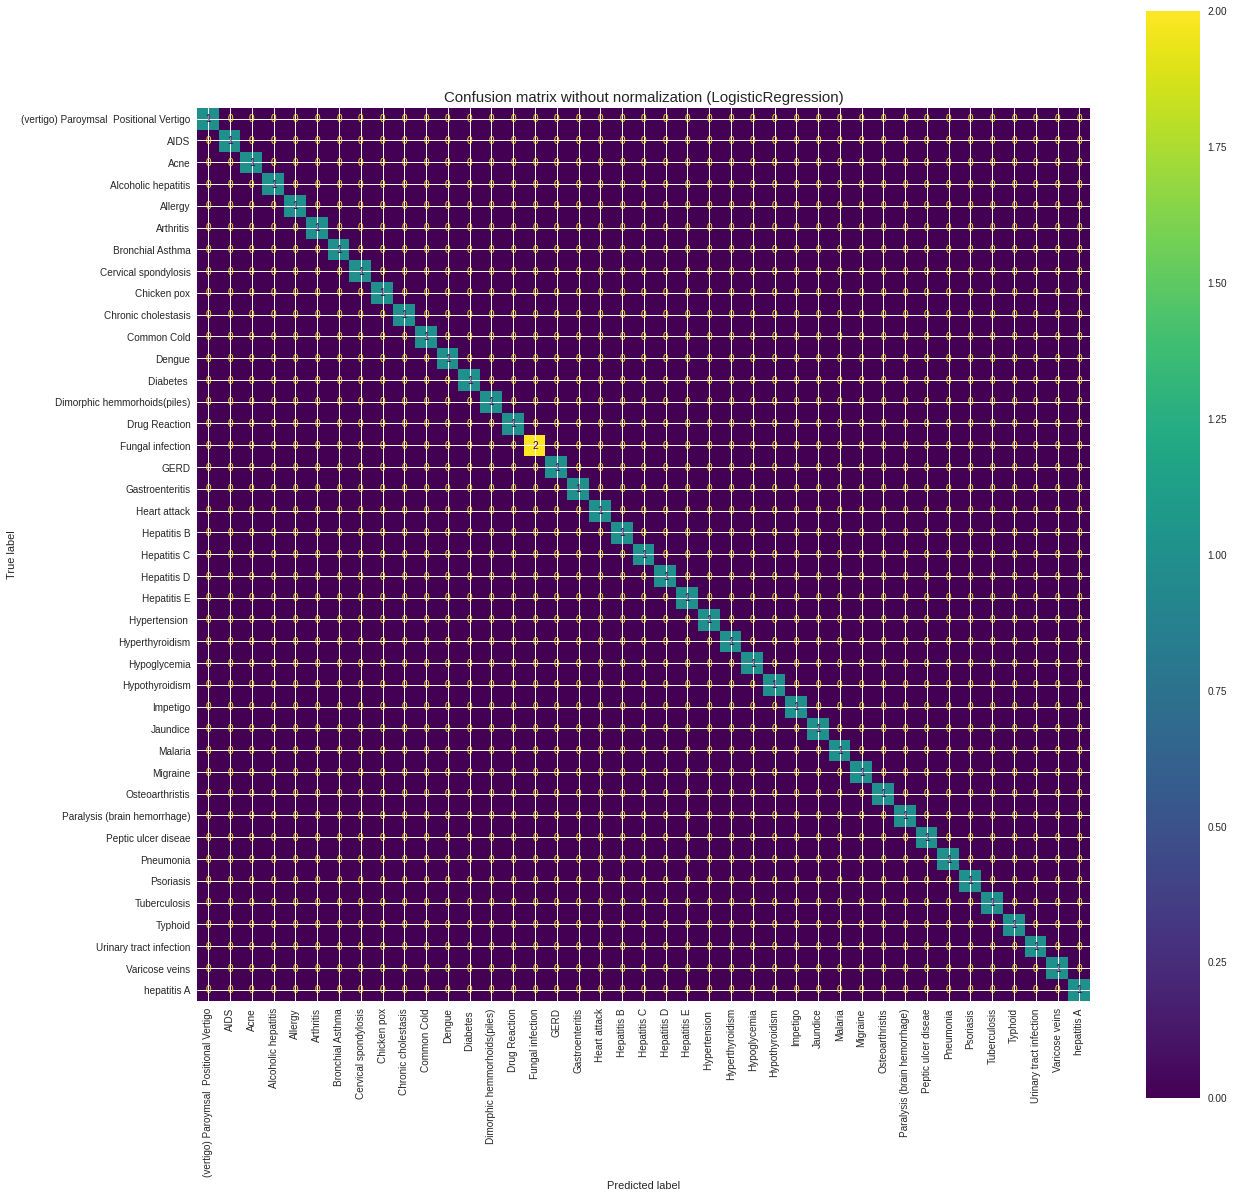

In [51]:
pylab.rcParams['figure.figsize'] = (20, 20)
disp = plot_confusion_matrix(lr, X_testing, Y_testing, xticks_rotation="vertical")
disp.ax_.set_title("Confusion matrix without normalization (LogisticRegression)", fontsize=15)

In [52]:
start = time.time()
lr = LogisticRegression(random_state=21, multi_class="multinomial", C=0.2)
lr.fit(X, Y)
end_fit = time.time()
y_pred_lr = lr.predict(X_testing)
end_predict  = time.time()
print(classification_report(Y_testing, y_pred_lr))
print(f'Время обучения {round((end_fit - start), 2)} секунд')
print(f'Время прогноза {round((end_predict - end_fit), 2)} секунд')
print(f'Accuracy: {accuracy_score(Y_testing, y_pred_lr)}')
data1 = data1 + [['LogisticRegression', '(multi_class=multinomial, C=0.2)', round(accuracy_score(Y_testing, y_pred_lr),4), 
                  round((end_fit - start), 2), round((end_predict - end_fit), 2)]]

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

## SVM линейная

Метод опорных векторов (Support Vector Machine - SVM) - это очень мощная и универсальная модель машинного обучения, способная выполнять линейную или нелинейную классификацию, регрессию и даже выявление выбросов. Она является одной из самых популярных моделей в МО. Методы SVM особенно хорошо подходят для классификации сложных, но небольших или средних наборов данных.
Методы SVM чувствительны к масштабам признаков, поэтому их необходимо масштабировать (например, с использованием класса StandardScaler). Гиперпараметр С управляет зазором (меньшее значение ведет к более широкой полосе, но большему числу нарушений зазора).

In [145]:
start = time.time()
svm_line = Pipeline([
                        ("scaler", StandardScaler()),
                        ("linear_svc", LinearSVC(C=1, random_state=21, loss="hinge")),
                    ])
svm_line.fit(X, Y)
end_fit = time.time()
y_pred_svm_line = svm_line.predict(X_testing)
end_predict  = time.time()
print(classification_report(Y_testing, y_pred_svm_line))
print(f'Время обучения {round((end_fit - start), 2)} секунд')
print(f'Время прогноза {round((end_predict - end_fit), 2)} секунд')
print(f'Accuracy: {accuracy_score(Y_testing, y_pred_svm_line)}')
data1 = data1 + [['LinearSVC', '(C=1, loss=hinge)', round(accuracy_score(Y_testing, y_pred_svm_line),4), 
                  round((end_fit - start), 2), round((end_predict - end_fit), 2)]]

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

Text(0.5, 1.0, 'Confusion matrix without normalization (LinearSVC)')

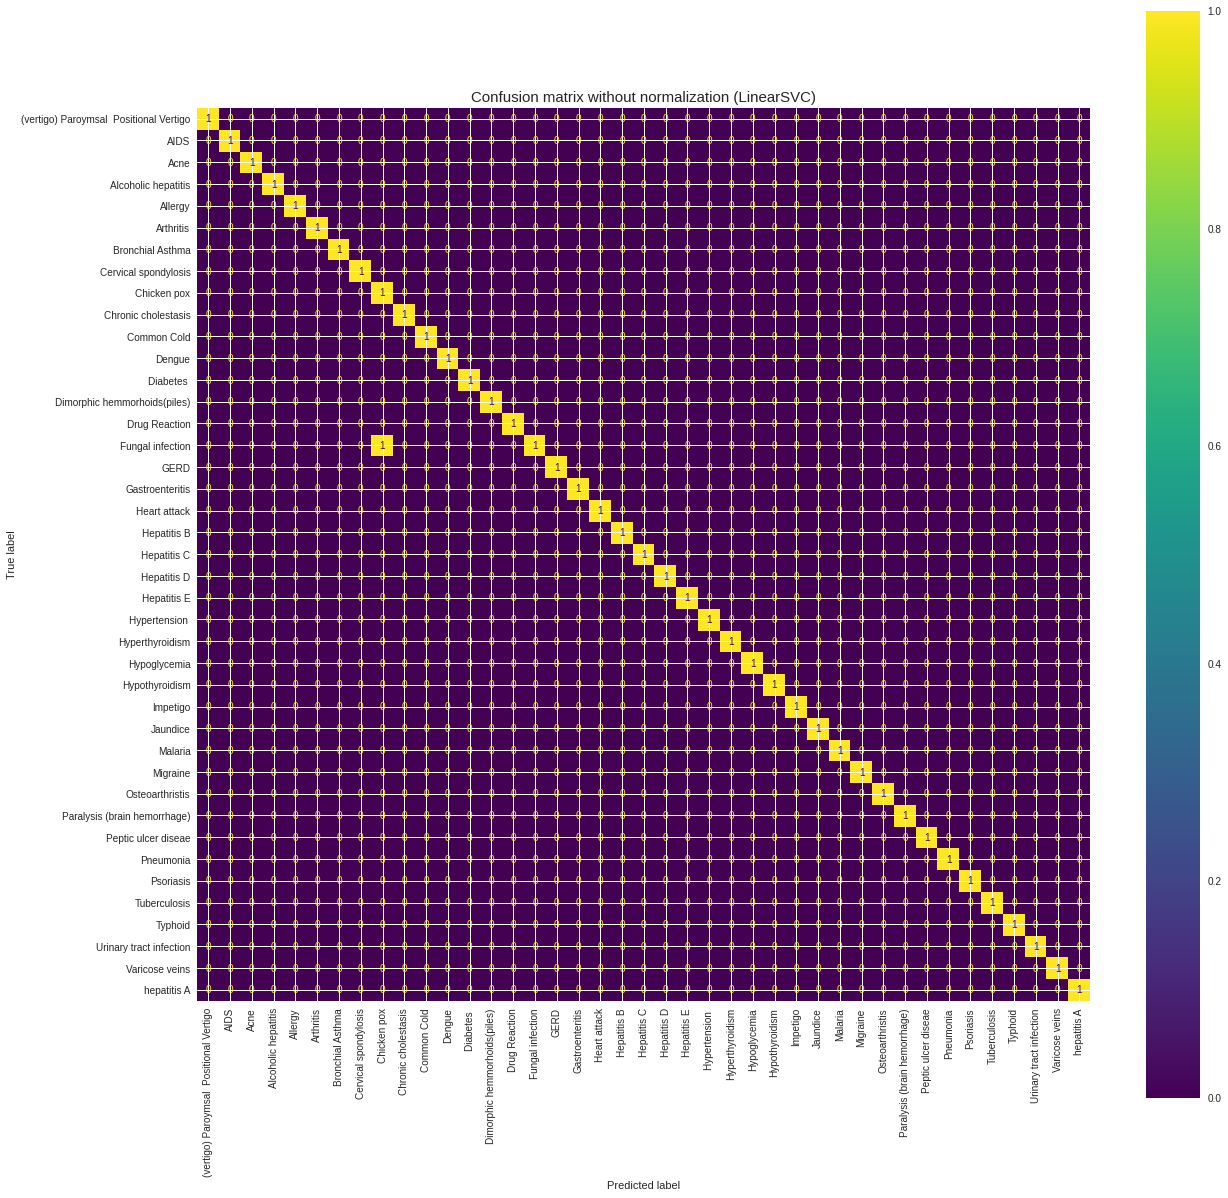

In [54]:
# pylab.rcParams['figure.figsize'] = (20, 20)
disp = plot_confusion_matrix(svm_line, X_testing, Y_testing, xticks_rotation="vertical")
disp.ax_.set_title("Confusion matrix without normalization (LinearSVC)", fontsize=15)

In [55]:
start = time.time()
svm_line = Pipeline([
                        ("scaler", StandardScaler()),
                        ("linear_svc", LinearSVC(C=10, random_state=21, loss="hinge")),
                    ])
svm_line.fit(X, Y)
end_fit = time.time()
y_pred_svm_line = svm_line.predict(X_testing)
end_predict  = time.time()
print(classification_report(Y_testing, y_pred_svm_line))
print(f'Время обучения {round((end_fit - start), 2)} секунд')
print(f'Время прогноза {round((end_predict - end_fit), 2)} секунд')
print(f'Accuracy: {accuracy_score(Y_testing, y_pred_svm_line)}')
data1 = data1 + [['LinearSVC', '(C=10)', round(accuracy_score(Y_testing, y_pred_svm_line),4), 
                  round((end_fit - start), 2), round((end_predict - end_fit), 2)]]

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

In [57]:
start = time.time()
svm_line = Pipeline([
                        ("scaler", StandardScaler()),
                        ("linear_svc", SVC(kernel="linear", C=1, random_state=21)),
                    ])
svm_line.fit(X, Y)
end_fit = time.time()
y_pred_svm_line = svm_line.predict(X_testing)
end_predict  = time.time()
print(classification_report(Y_testing, y_pred_svm_line))
print(f'Время обучения {round((end_fit - start), 2)} секунд')
print(f'Время прогноза {round((end_predict - end_fit), 2)} секунд')
print(f'Accuracy: {accuracy_score(Y_testing, y_pred_svm_line)}')
data1 = data1 + [['SVC', '(kernel=linear, C=1)', round(accuracy_score(Y_testing, y_pred_svm_line),4), 
                  round((end_fit - start), 2), round((end_predict - end_fit), 2)]]

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

In [58]:
start = time.time()
svm_line = Pipeline([
                        ("scaler", StandardScaler()),
                        ("linear_svc", SVC(kernel="linear", C=10, random_state=21)),
                    ])
svm_line.fit(X, Y)
end_fit = time.time()
y_pred_svm_line = svm_line.predict(X_testing)
end_predict  = time.time()
print(classification_report(Y_testing, y_pred_svm_line))
print(f'Время обучения {round((end_fit - start), 2)} секунд')
print(f'Время прогноза {round((end_predict - end_fit), 2)} секунд')
print(f'Accuracy: {accuracy_score(Y_testing, y_pred_svm_line)}')
data1 = data1 + [['SVC', '(kernel=linear, C=10)', round(accuracy_score(Y_testing, y_pred_svm_line),4), 
                  round((end_fit - start), 2), round((end_predict - end_fit), 2)]]

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

## SVM полиномиальная

Один из подходов к обработке нелинейных наборов данных предусматривает добавление дополнительных признаков, таких как полиномиальные признаки, в ряде ситуаций результатом может оказаться линейно сепарабельный набор данных. Добавление полиномиальных признаков просто в реализации и может великолепно работать со всеми видами алгоритмов МО (не только с методами SVM), но при низкой полиномиальной степени оно не способно справляться с очень сложными наборами данных, а при высокой полиномиальной степени оно создает огромное количество признаков, делая модель крайне медленной. К счастью, когда используются методы SVM применяется математический прием, называемый ядерным трюком (kernel trick). Он позволяет получить тот же самый результат, как если бы было добавлено много полиномиальных признаков, даже при полиномах очень высокой степени, без фактического их добавления. Если модель переобучается, то можно попробовать сократить полиномиальную степень, и наоборот, если модель недообучается - увеличить её. Гиперпараметр coef0 управляет тем, насколько сильно полиномы высокой степени влияют на модель в сравнении с полиномами низкой степени.

In [59]:
start = time.time()
svm_poly = Pipeline([
                        ("scaler", StandardScaler()),
                        ("poly_svc", SVC(kernel="poly", degree=3, coef0=1, C=5, random_state=21)),
                    ])

svm_poly.fit(X, Y)
end_fit = time.time()
y_pred_svm_poly = svm_poly.predict(X_testing)
end_predict  = time.time()
print(classification_report(Y_testing, y_pred_svm_poly))
print(f'Время обучения {round((end_fit - start), 2)} секунд')
print(f'Время прогноза {round((end_predict - end_fit), 2)} секунд')
print(f'Accuracy: {accuracy_score(Y_testing, y_pred_svm_poly)}')
data1 = data1 + [['SVC', '(kernel=poly, degree=3, coef0=1, C=5)', round(accuracy_score(Y_testing, y_pred_svm_poly),4), 
                  round((end_fit - start), 2), round((end_predict - end_fit), 2)]]

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

Text(0.5, 1.0, 'Confusion matrix without normalization (SVM polynomial)')

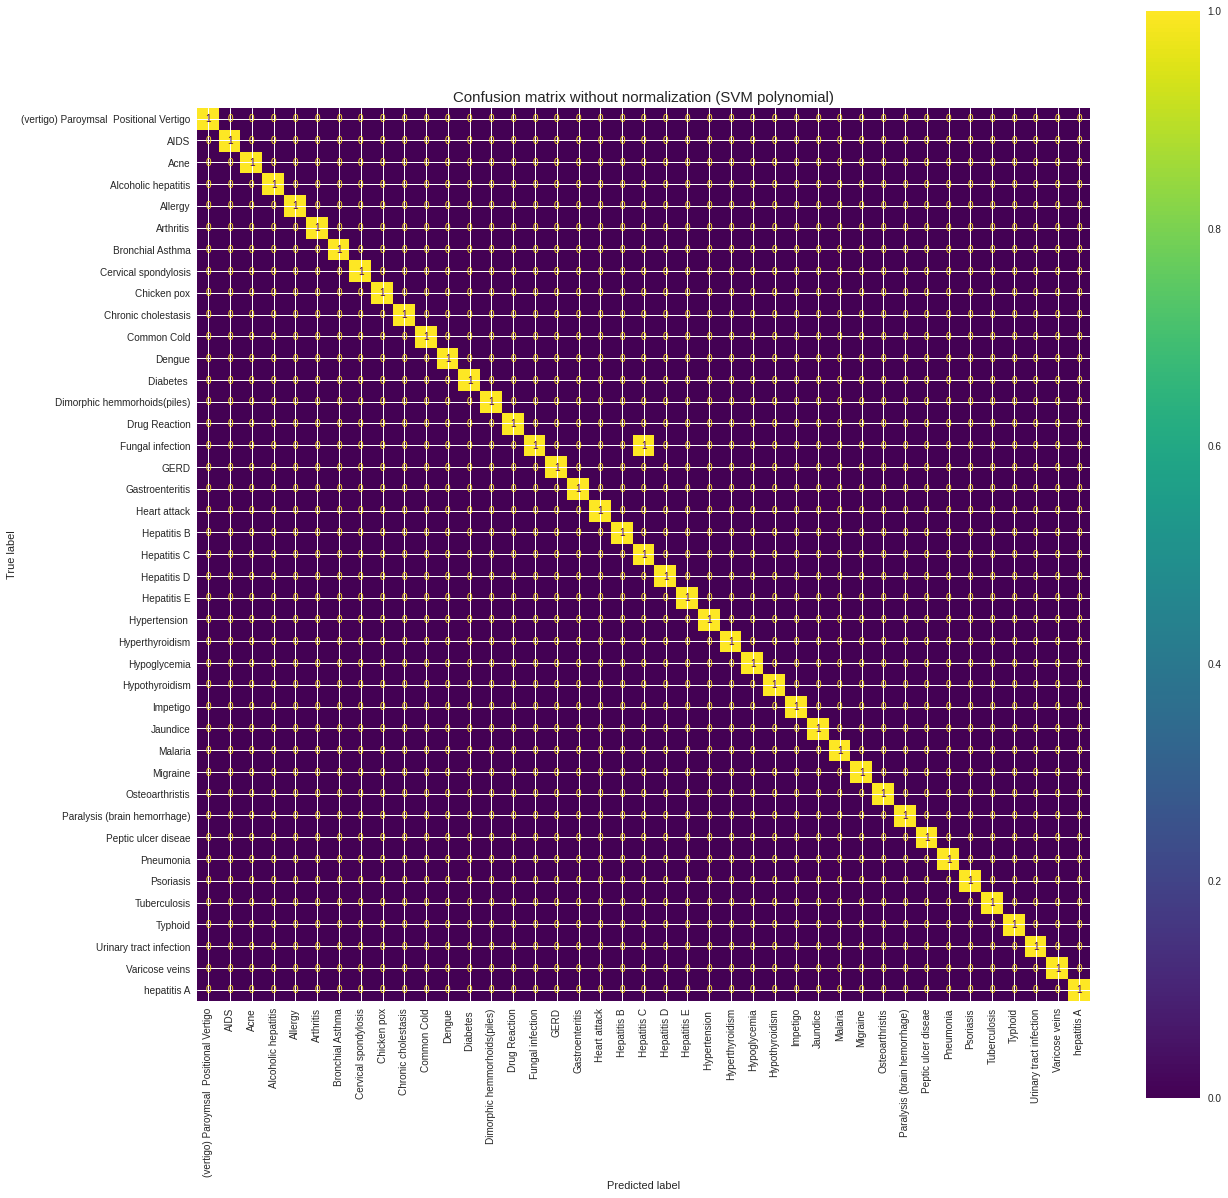

In [60]:
# pylab.rcParams['figure.figsize'] = (20, 20)
disp = plot_confusion_matrix(svm_poly, X_testing, Y_testing, xticks_rotation="vertical")
disp.ax_.set_title("Confusion matrix without normalization (SVM polynomial)", fontsize=15)

In [61]:
start = time.time()
svm_poly = Pipeline([
                        ("scaler", StandardScaler()),
                        ("poly_svc", SVC(kernel="poly", degree=20, coef0=1, C=20, random_state=21)),
                    ])

svm_poly.fit(X, Y)
end_fit = time.time()
y_pred_svm_poly = svm_poly.predict(X_testing)
end_predict  = time.time()
print(classification_report(Y_testing, y_pred_svm_poly))
print(f'Время обучения {round((end_fit - start), 2)} секунд')
print(f'Время прогноза {round((end_predict - end_fit), 2)} секунд')
print(f'Accuracy: {accuracy_score(Y_testing, y_pred_svm_poly)}')
data1 = data1 + [['SVC', '(kernel=poly, degree=20, coef0=1, C=20)', round(accuracy_score(Y_testing, y_pred_svm_poly),4), 
                  round((end_fit - start), 2), round((end_predict - end_fit), 2)]]

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

## SVM RBF

Еще одна методика решения нелинейных задач предусматривает добавление признаков, подсчитанных с применением функции близости (similarity function), которая измеряет, сколько сходства каждый образец имеет с отдельным ориентиром (landmark). RBF (Radial Basis Function) - гауссова радиальная базисная функция. Увеличение gamma приводит к тому, что сфера влияния каждого образца уменьшается: граница решений становится более неравномерной, извивающейся вблизи индивидуальных образцов. gamma действует аналогично гиперпараметру регуляризации: если модель переобучается, нужно уменьшить значение gamma, а если недообучается - то увеличить его.

In [62]:
start = time.time()
svm_rbf = Pipeline([
                        ("scaler", StandardScaler()),
                        ("rbf_svc", SVC(kernel="rbf", gamma=5, C=0.001, random_state=21)),
                    ])

svm_rbf.fit(X, Y)
end_fit = time.time()
y_pred_svm_rbf = svm_rbf.predict(X_testing)
end_predict  = time.time()
print(classification_report(Y_testing, y_pred_svm_rbf))
print(f'Время обучения {round((end_fit - start), 2)} секунд')
print(f'Время прогноза {round((end_predict - end_fit), 2)} секунд')
print(f'Accuracy: {accuracy_score(Y_testing, y_pred_svm_rbf)}')
data1 = data1 + [['SVC', '(kernel=rbf, gamma=5, C=0.001)', round(accuracy_score(Y_testing, y_pred_svm_rbf),4), 
                  round((end_fit - start), 2), round((end_predict - end_fit), 2)]]

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

Text(0.5, 1.0, 'Confusion matrix without normalization (SVM RBF)')

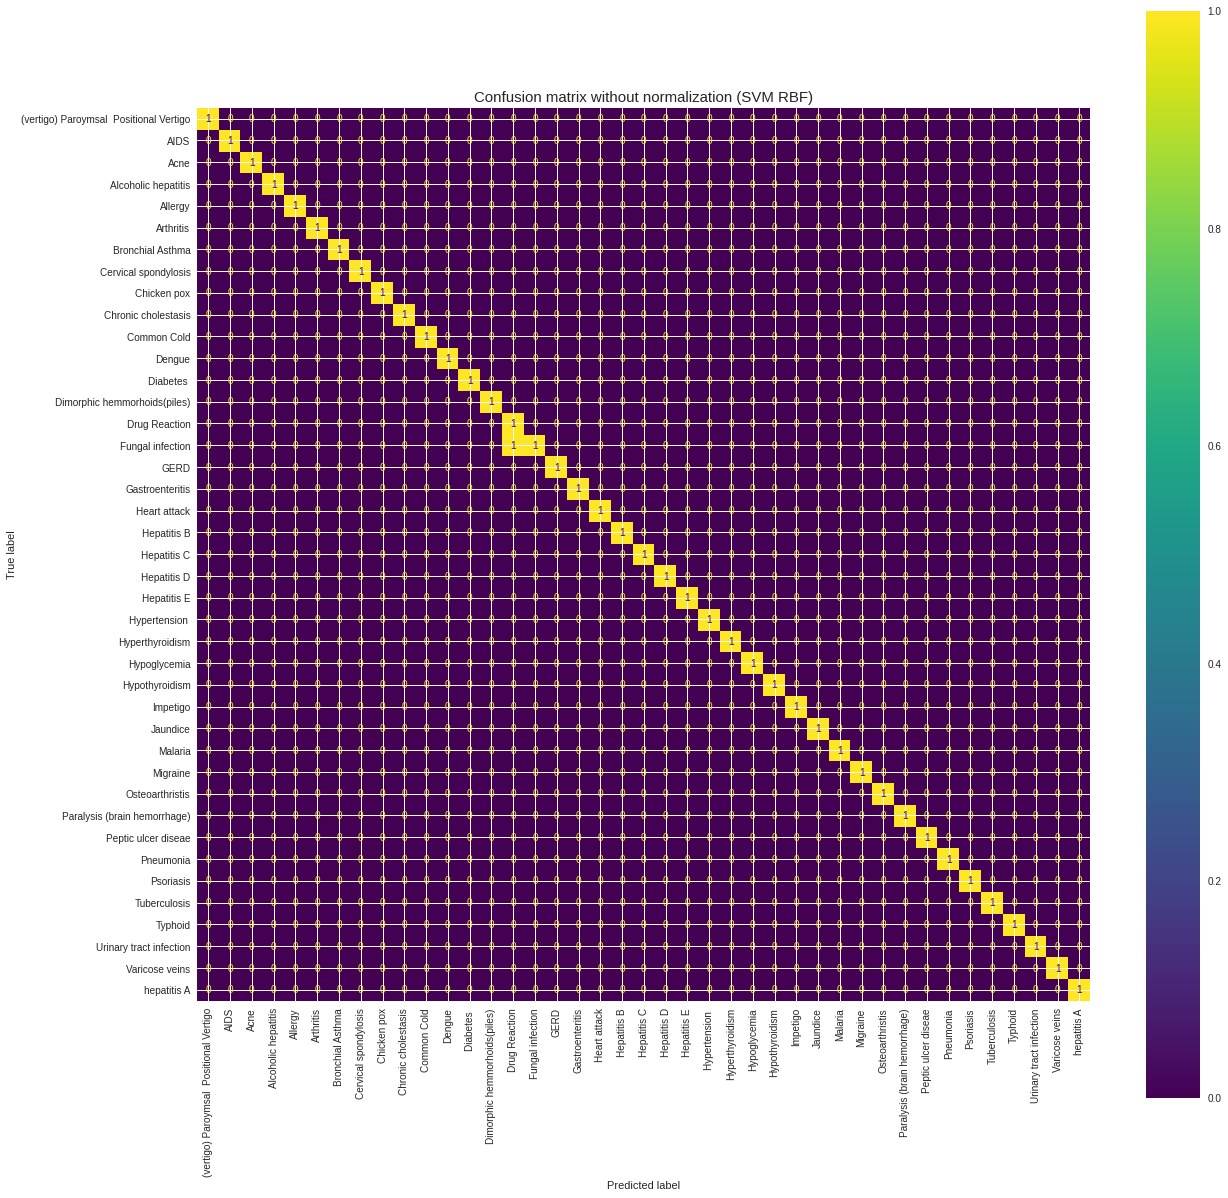

In [63]:
# pylab.rcParams['figure.figsize'] = (20, 20)
disp = plot_confusion_matrix(svm_rbf, X_testing, Y_testing, xticks_rotation="vertical")
disp.ax_.set_title("Confusion matrix without normalization (SVM RBF)", fontsize=15)

In [64]:
start = time.time()
svm_rbf = Pipeline([
                        ("scaler", StandardScaler()),
                        ("rbf_svc", SVC(kernel="rbf", gamma=0.1, C=1000, random_state=21)),
                    ])

svm_rbf.fit(X, Y)
end_fit = time.time()
y_pred_svm_rbf = svm_rbf.predict(X_testing)
end_predict  = time.time()
print(classification_report(Y_testing, y_pred_svm_rbf))
print(f'Время обучения {round((end_fit - start), 2)} секунд')
print(f'Время прогноза {round((end_predict - end_fit), 2)} секунд')
print(f'Accuracy: {accuracy_score(Y_testing, y_pred_svm_rbf)}')
data1 = data1 + [['SVC', '(kernel=rbf, gamma=0.1, C=1000)', round(accuracy_score(Y_testing, y_pred_svm_rbf),4), 
                  round((end_fit - start), 2), round((end_predict - end_fit), 2)]]

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

Text(0.5, 1.0, 'Confusion matrix without normalization (SVM RBF)')

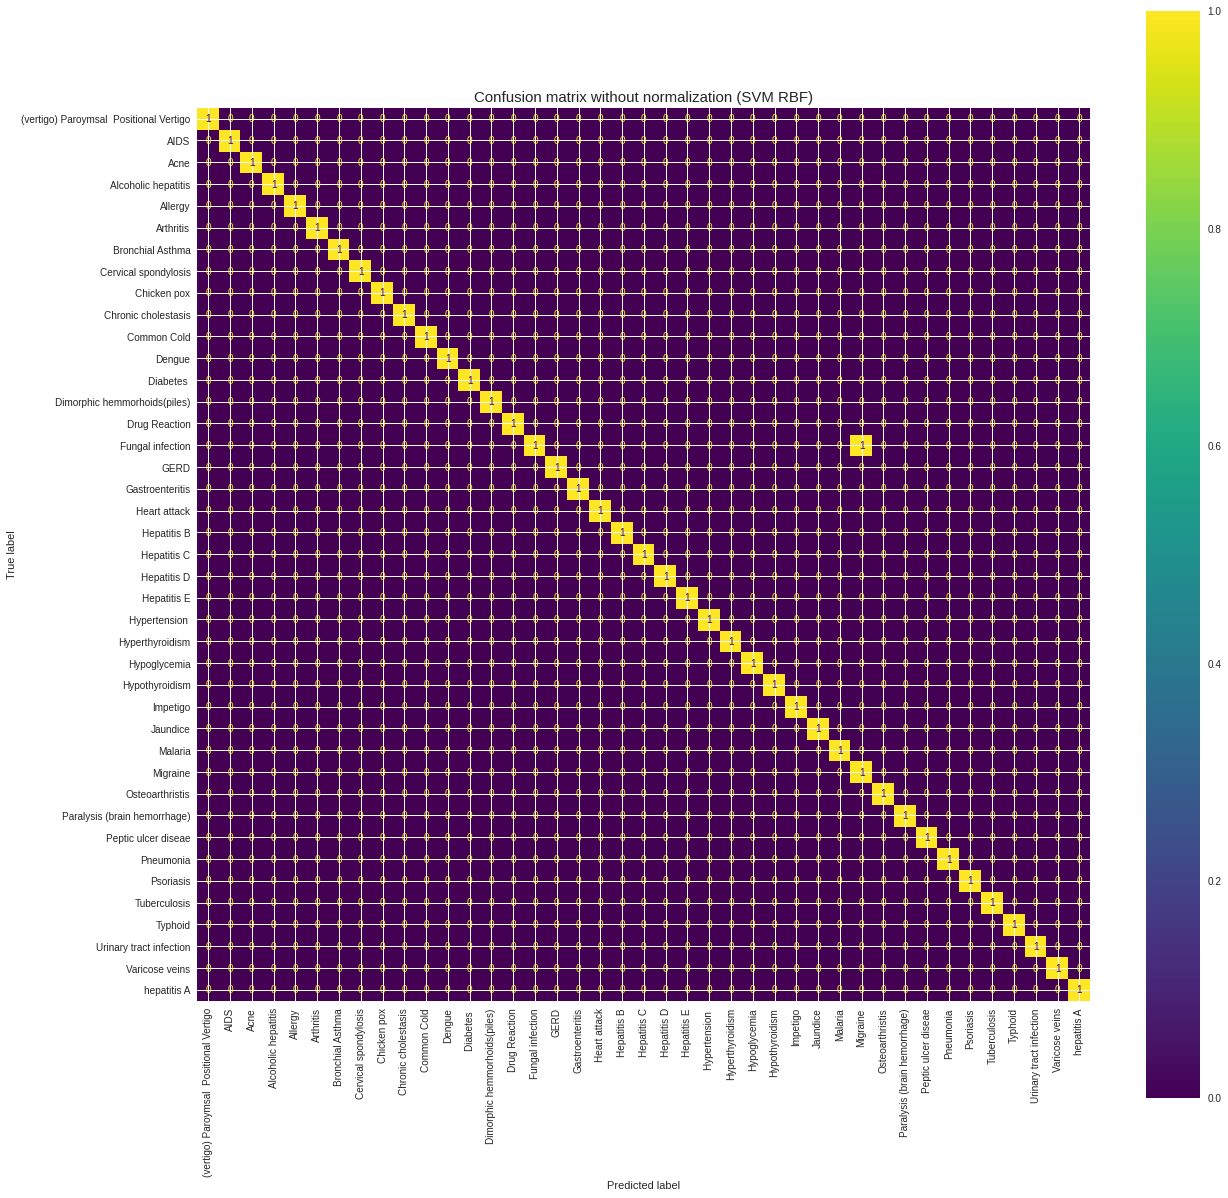

In [65]:
# pylab.rcParams['figure.figsize'] = (20, 20)
disp = plot_confusion_matrix(svm_rbf, X_testing, Y_testing, xticks_rotation="vertical")
disp.ax_.set_title("Confusion matrix without normalization (SVM RBF)", fontsize=15)

## SVM сигмоидная

In [66]:
start = time.time()
svm_sigm = Pipeline([
                        ("scaler", StandardScaler()),
                        ("sigmoid_svc", SVC(kernel="sigmoid", C=50, random_state=21)),
                    ])

svm_sigm.fit(X, Y)
end_fit = time.time()
y_pred_svm_sigm = svm_sigm.predict(X_testing)
end_predict  = time.time()
print(classification_report(Y_testing, y_pred_svm_sigm))
print(f'Время обучения {round((end_fit - start), 2)} секунд')
print(f'Время прогноза {round((end_predict - end_fit), 2)} секунд')
print(f'Accuracy: {accuracy_score(Y_testing, y_pred_svm_sigm)}')
data1 = data1 + [['SVC', '(kernel=sigmoid, C=50)', round(accuracy_score(Y_testing, y_pred_svm_sigm),4), 
                  round((end_fit - start), 2), round((end_predict - end_fit), 2)]]

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

Text(0.5, 1.0, 'Confusion matrix without normalization (SVM sigmoid)')

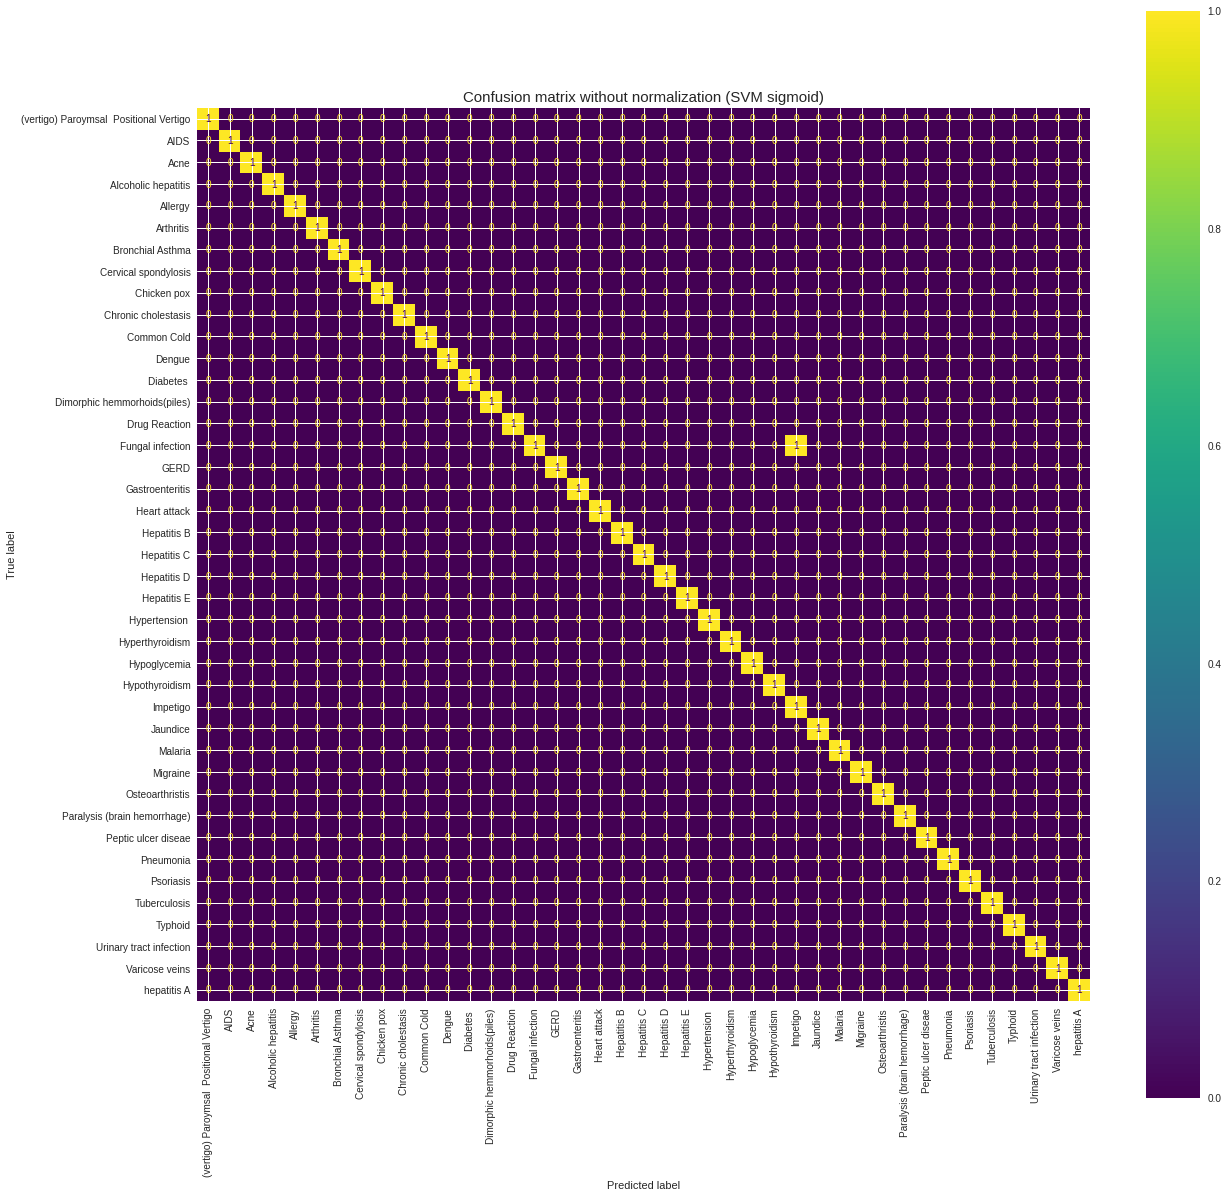

In [67]:
# pylab.rcParams['figure.figsize'] = (20, 20)
disp = plot_confusion_matrix(svm_sigm, X_testing, Y_testing, xticks_rotation="vertical")
disp.ax_.set_title("Confusion matrix without normalization (SVM sigmoid)", fontsize=15)

## Дерево решений

Испытаем классификатор дерева решений совместно с BaggingClassifier.

BaggingClassifier предусматривает использование для каждого прогнозатора одного и того же алгоритма обучения, но обучение прогнозаторов на разных случайных поднаборах обучающего набора. Когда выборка осуществляется с заменой, такой метод называется бэггингом (bagging - сокращение от bootstrap aggregating (бутстрэп - агрегирование)). Когда выборка выполняется без замены, такой метод называется вставкой или вклеиванием (pasting).

Код ниже обучает 700 классификаторов на основе деревьев принятия решений, каждый из которых обучается на 200 обучающих экземплярах, случайно выбранных из обучающего набора с заменой (чтобы вместо замены применить вставку, необходимо установить bootstrap=False). n_jobs сообщает количество процесоррных ядер для использования при обучении и прогнозировании (-1 указывает на необходимость участия всех доступных ядер).

In [68]:
start = time.time()
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=700, max_samples=200, bootstrap=True, n_jobs=-1)
bag_clf.fit(X, Y)
end_fit = time.time()
y_pred_bag = bag_clf.predict(X_testing)
end_predict  = time.time()
print(classification_report(Y_testing, y_pred_bag))
print(f'Время обучения {round((end_fit - start), 2)} секунд')
print(f'Время прогноза {round((end_predict - end_fit), 2)} секунд')
print(f'Accuracy: {accuracy_score(Y_testing, y_pred_bag)}')
data1 = data1 + [['BaggingC (DecisionTreeC)', '(n_estimators=700, max_samples=200, bootstrap=True)', round(accuracy_score(Y_testing, y_pred_bag),4), 
                  round((end_fit - start), 2), round((end_predict - end_fit), 2)]]

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

Классификатор дерева принятия решений без использования вставки и замены.

In [69]:
start = time.time()
tree = DecisionTreeClassifier(random_state=21, max_depth=30)
tree.fit(X, Y)
end_fit = time.time()
y_pred_tree = tree.predict(X_testing)
end_predict  = time.time()
print(classification_report(Y_testing, y_pred_tree))
print(f'Время обучения {round((end_fit - start), 2)} секунд')
print(f'Время прогноза {round((end_predict - end_fit), 2)} секунд')
print(f'Accuracy: {accuracy_score(Y_testing, y_pred_tree)}')
data1 = data1 + [['DecisionTreeClassifier', '(max_depth=30)', round(accuracy_score(Y_testing, y_pred_tree),4), 
                  round((end_fit - start), 2), round((end_predict - end_fit), 2)]]

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       0.12      1.00      0.22         1
                                   Acne       0.00      0.00      0.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       0.00      0.00      0.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       0.00      0.00      0.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

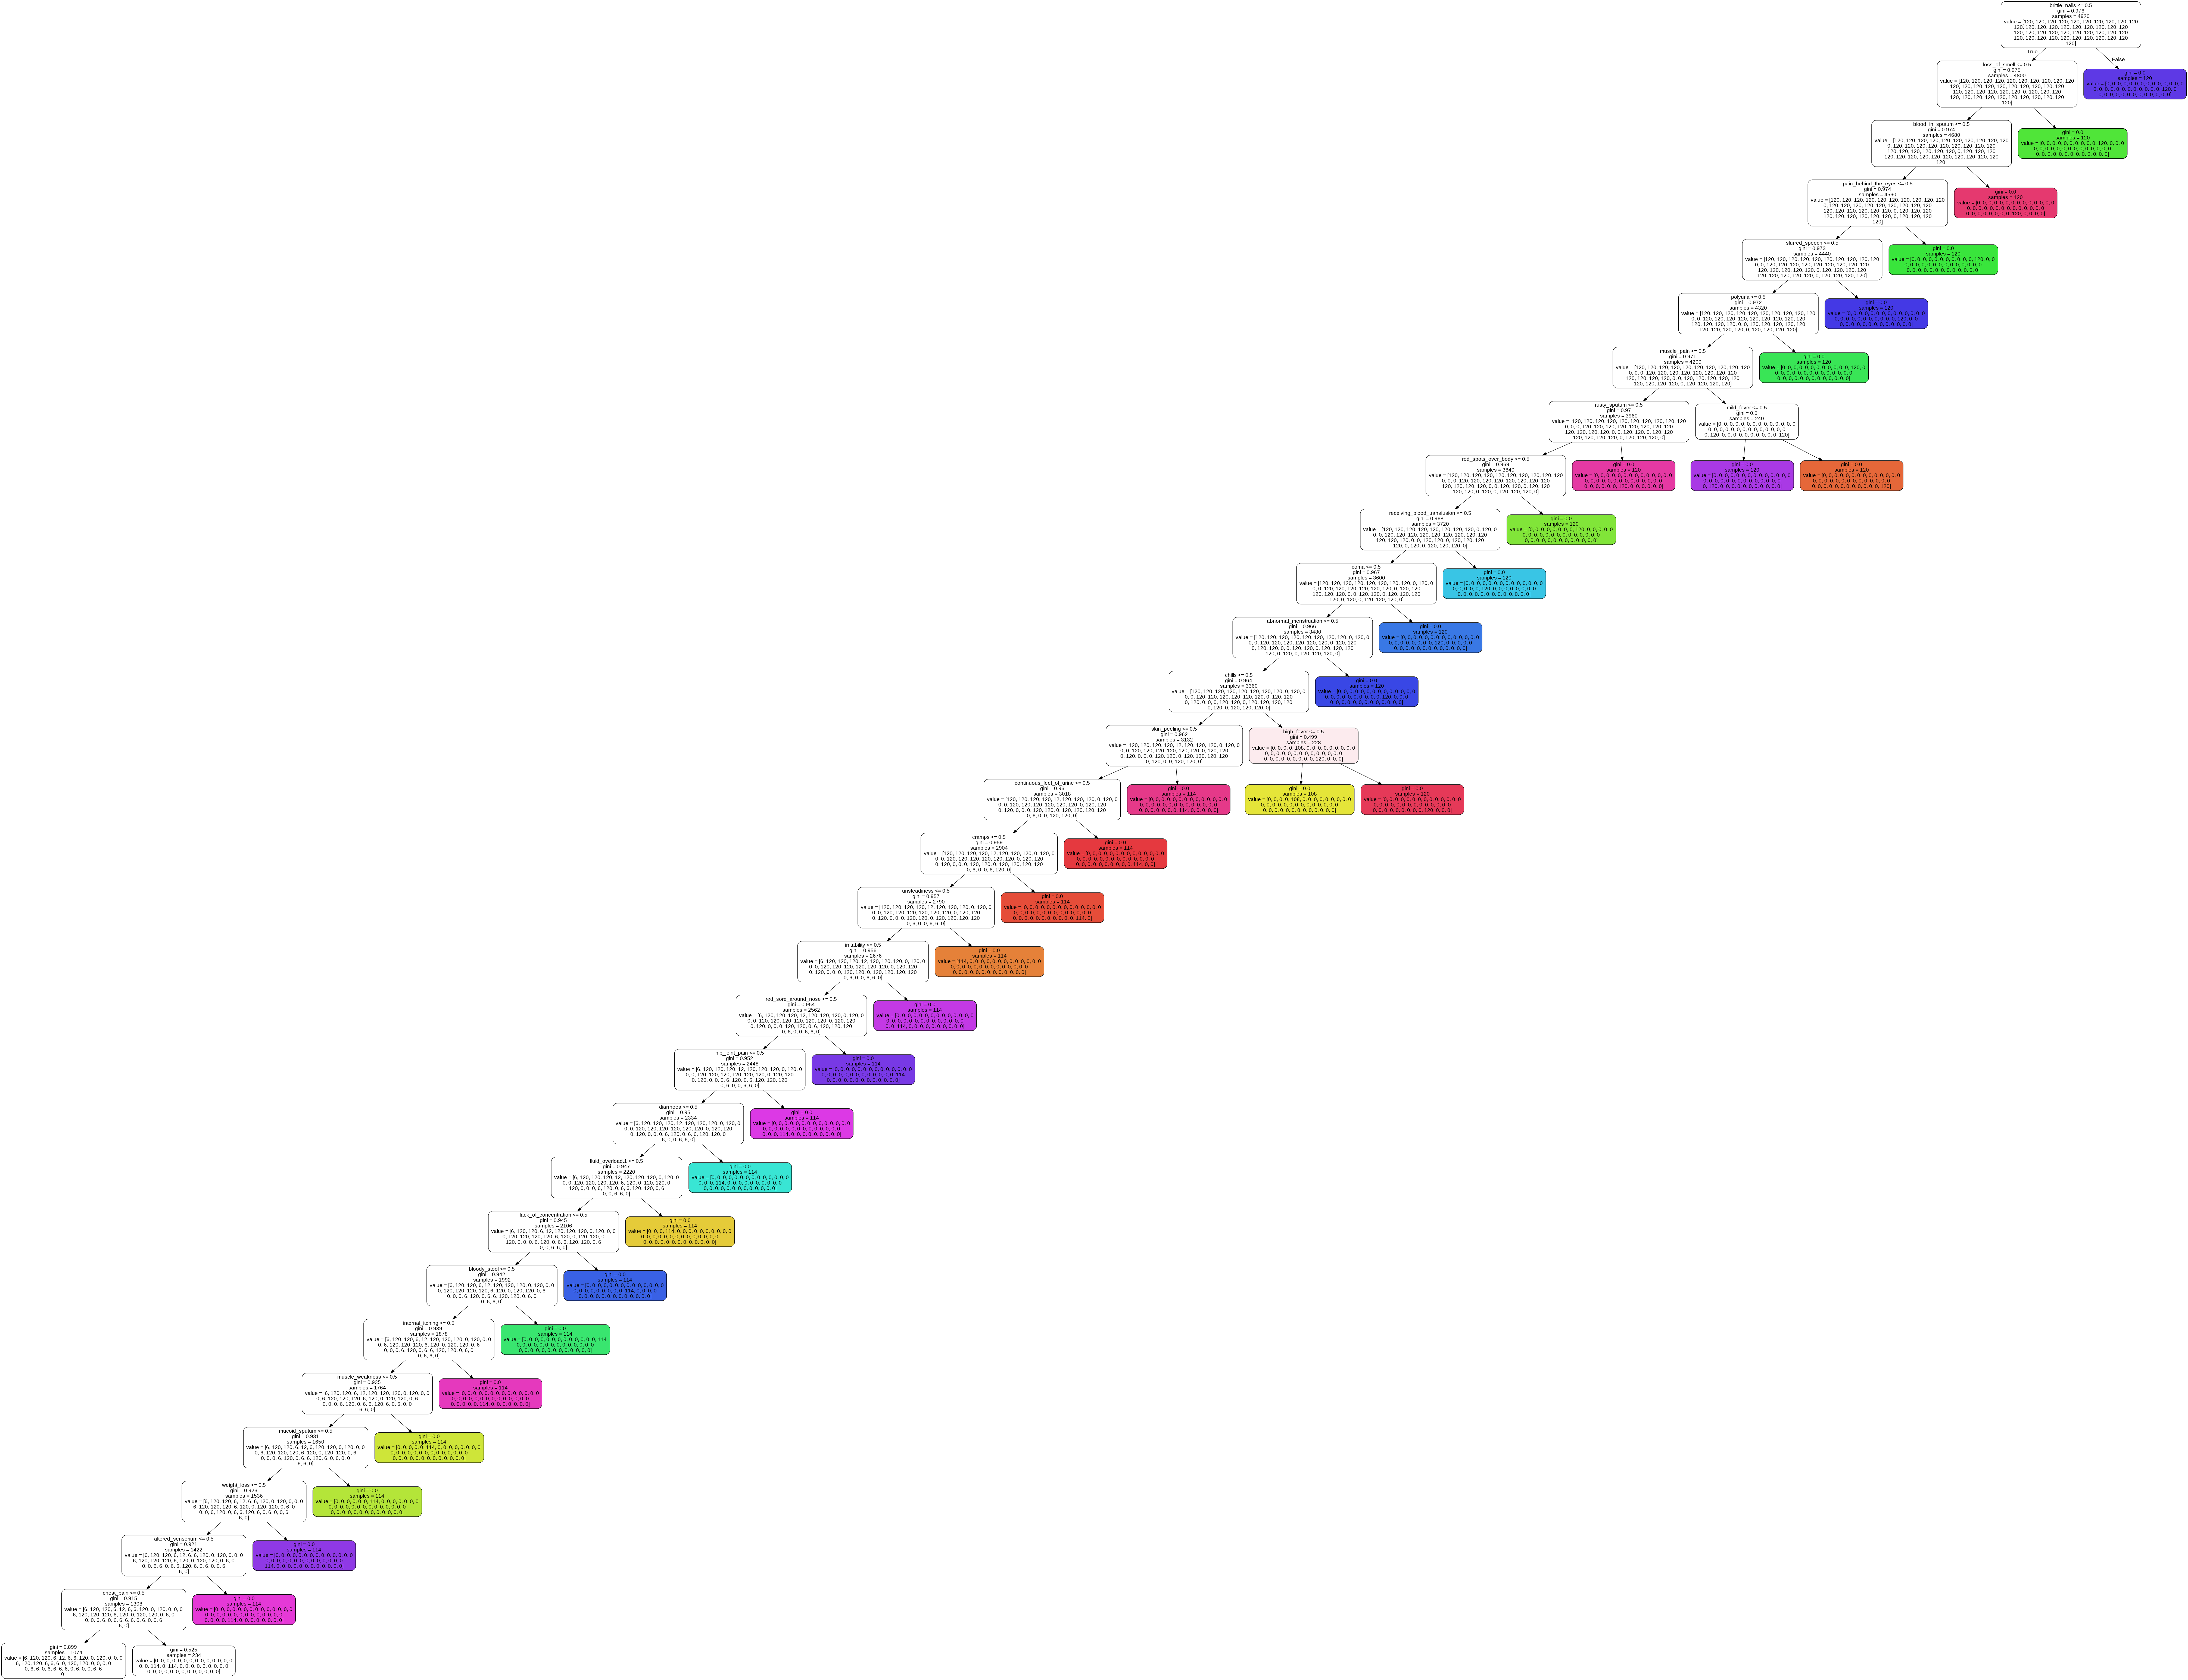

In [70]:
export_graphviz(tree, feature_names=X_testing.columns, out_file='tree.dot', rounded=True, filled=True)
!dot -Tpng 'tree.dot' -o 'tree.png'
display(Image('tree.png', unconfined=True))

Text(0.5, 1.0, 'Confusion matrix without normalization (Decision tree)')

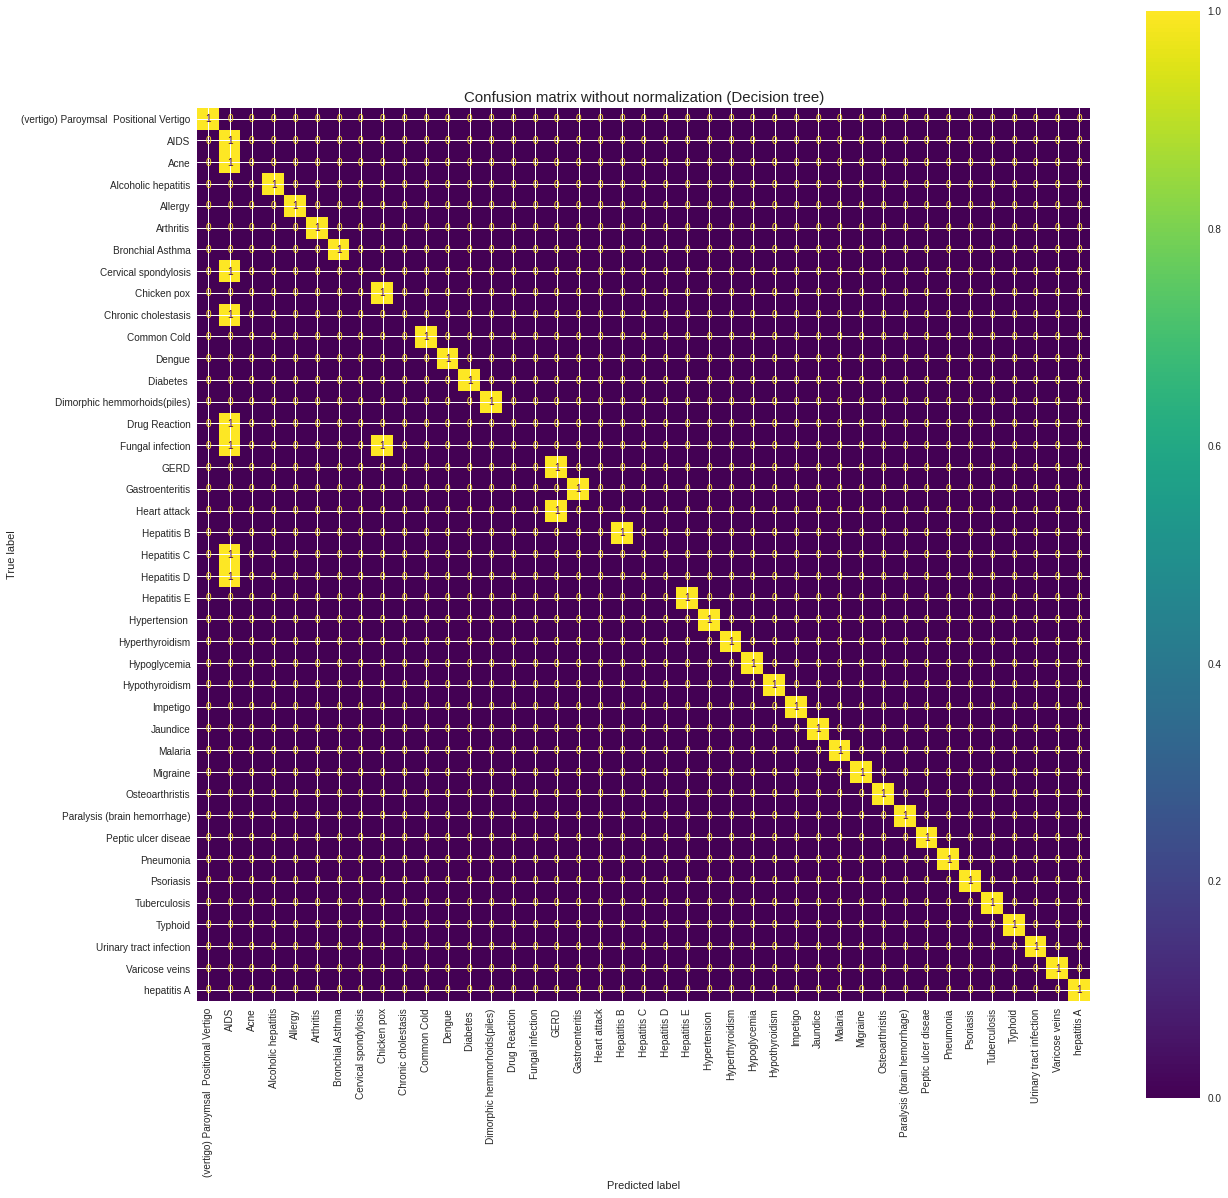

In [71]:
# pylab.rcParams['figure.figsize'] = (20, 20)
disp = plot_confusion_matrix(tree, X_testing, Y_testing, xticks_rotation="vertical")
disp.ax_.set_title("Confusion matrix without normalization (Decision tree)", fontsize=15)

In [72]:
start = time.time()
tree = DecisionTreeClassifier(random_state=21, max_depth=150)
tree.fit(X, Y)
end_fit = time.time()
y_pred_tree = tree.predict(X_testing)
end_predict  = time.time()
print(classification_report(Y_testing, y_pred_tree))
print(f'Время обучения {round((end_fit - start), 2)} секунд')
print(f'Время прогноза {round((end_predict - end_fit), 2)} секунд')
print(f'Accuracy: {accuracy_score(Y_testing, y_pred_tree)}')
data1 = data1 + [['DecisionTreeClassifier', '(max_depth=150)', round(accuracy_score(Y_testing, y_pred_tree),4), 
                  round((end_fit - start), 2), round((end_predict - end_fit), 2)]]

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

Text(0.5, 1.0, 'Confusion matrix without normalization (Decision tree)')

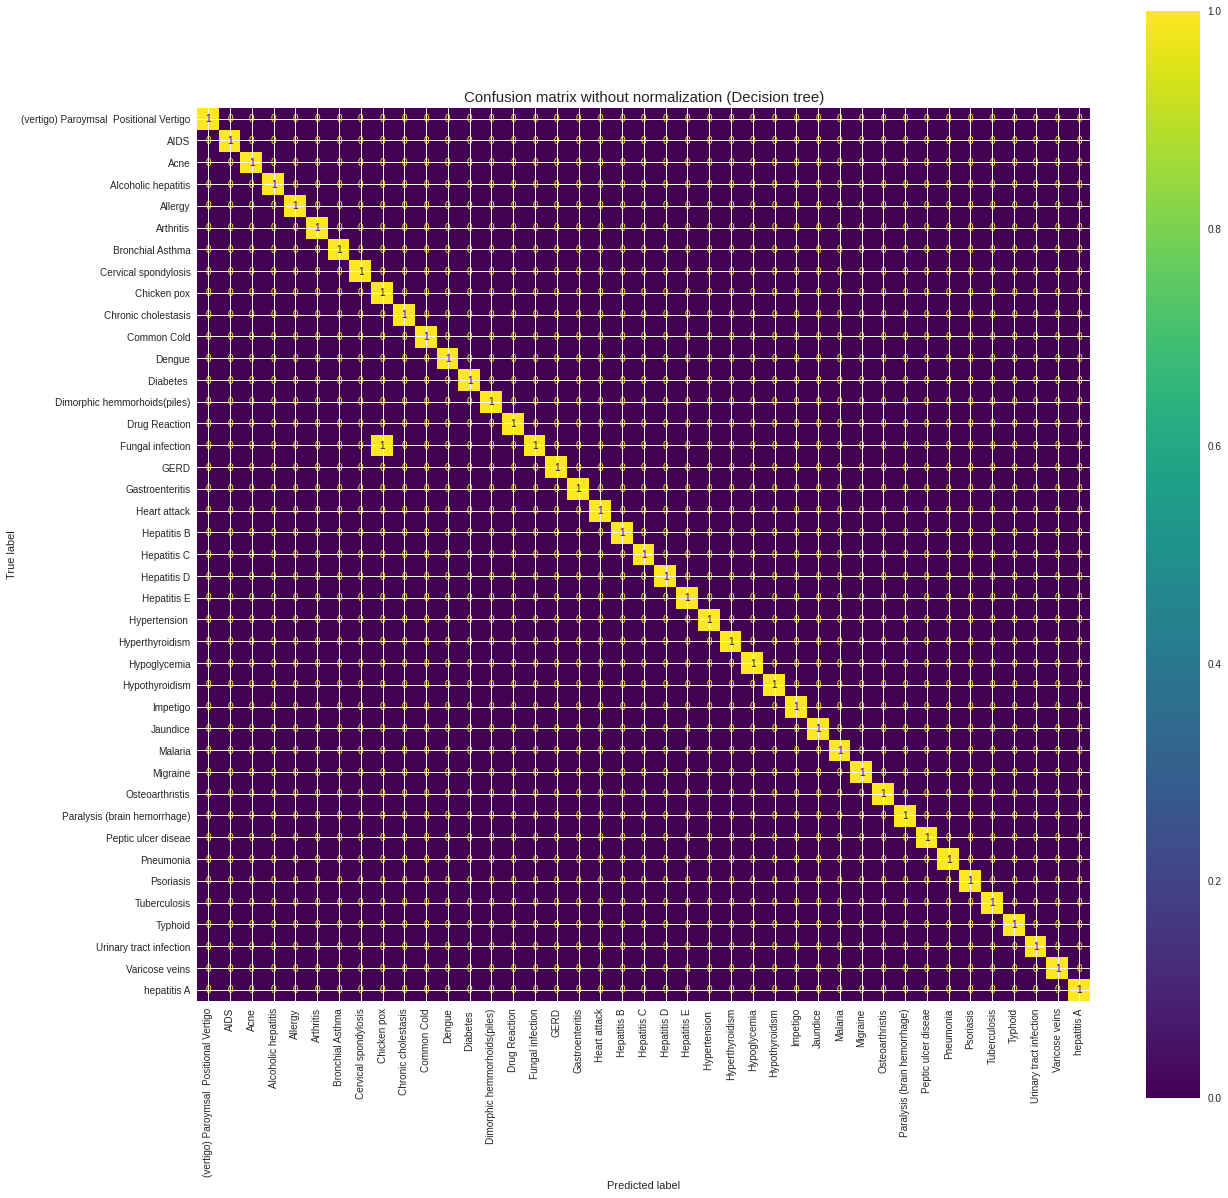

In [73]:
# pylab.rcParams['figure.figsize'] = (20, 20)
disp = plot_confusion_matrix(tree, X_testing, Y_testing, xticks_rotation="vertical")
disp.ax_.set_title("Confusion matrix without normalization (Decision tree)", fontsize=15)

## Random Forest

Случайный лес (random forest) - это ансамбль деревьев принятия решений, которые обычно обучены посредством метода бэггинга (либо иногда вставки), как правило с параметром max_samples, установленным в размер обучающего набора. Вместо построения экземпляра BaggingClassifier и его передачи экземпляру DecisionTreeClassifier можно применить класс RandomForestClassifier, который является более удобным и оптимизированным для деревьев принятия решений.
Код ниже обучает классификатор на основе случайного леса с 500 деревьями (каждое ограничено максимум 20 узлами), используя все процессорные ядра.

In [74]:
start = time.time()
rnd = RandomForestClassifier(n_estimators=500, max_leaf_nodes=20, n_jobs=-1, random_state=21)
rnd.fit(X, Y)
end_fit = time.time()
y_pred_rnd = rnd.predict(X_testing)
end_predict  = time.time()
print(classification_report(Y_testing, y_pred_rnd))
print(f'Время обучения {round((end_fit - start), 2)} секунд')
print(f'Время прогноза {round((end_predict - end_fit), 2)} секунд')
print(f'Accuracy: {accuracy_score(Y_testing, y_pred_rnd)}')
data1 = data1 + [['RandomForestClassifier', '(n_estimators=500, max_leaf_nodes=20)', round(accuracy_score(Y_testing, y_pred_rnd),4), 
                  round((end_fit - start), 2), round((end_predict - end_fit), 2)]]

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

Text(0.5, 1.0, 'Confusion matrix without normalization (Random Forest)')

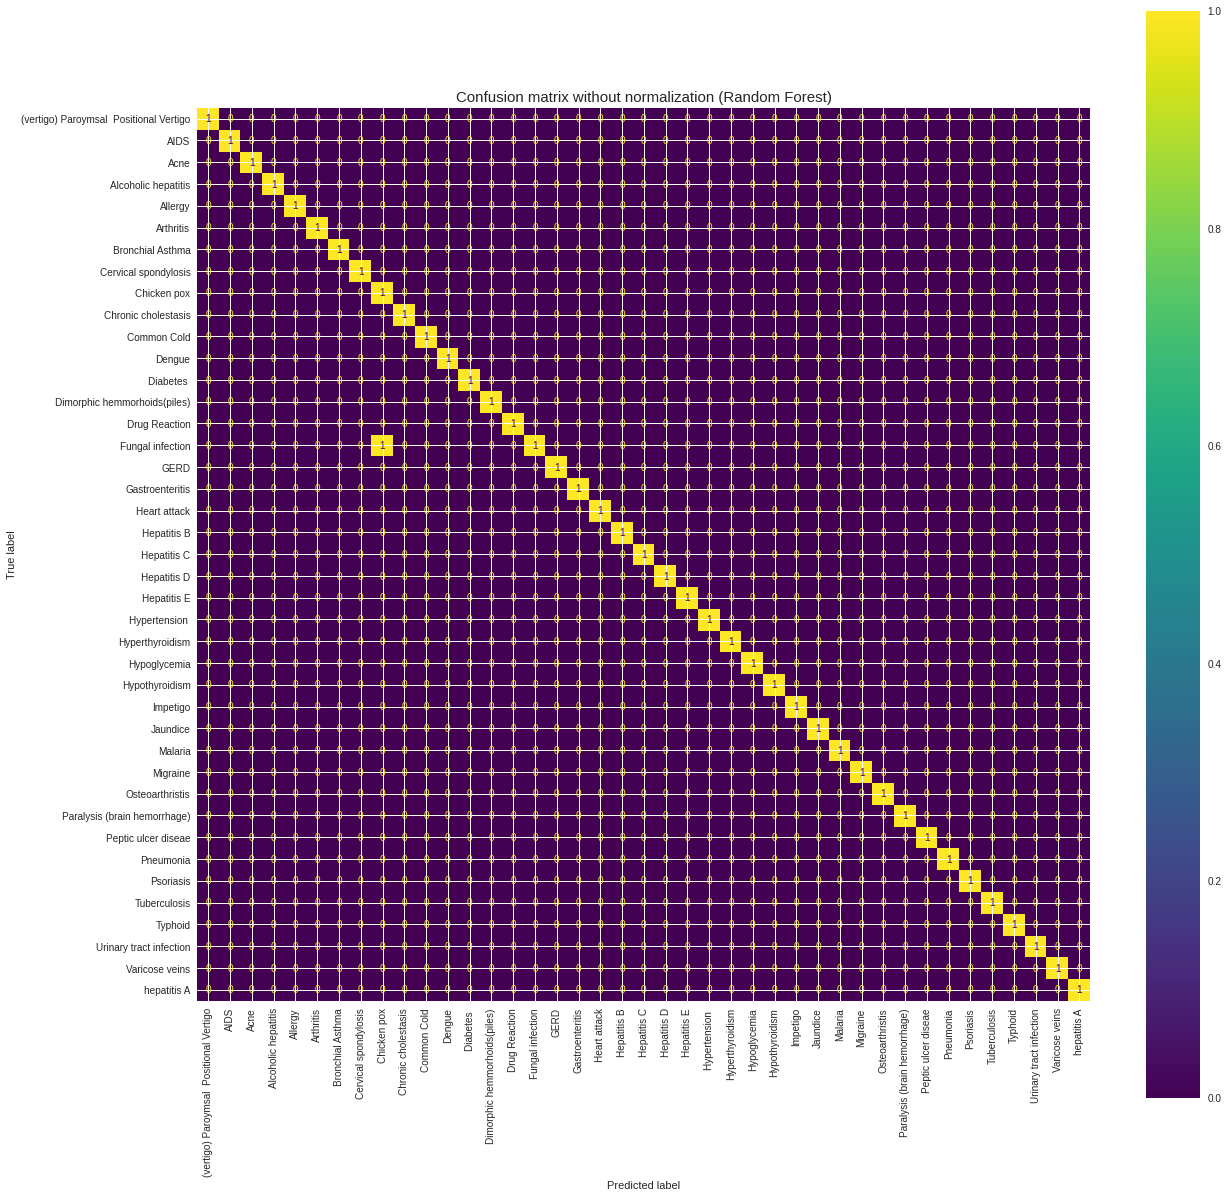

In [75]:
# pylab.rcParams['figure.figsize'] = (20, 20)
disp = plot_confusion_matrix(rnd, X_testing, Y_testing, xticks_rotation="vertical")
disp.ax_.set_title("Confusion matrix without normalization (Random Forest)", fontsize=15)

Замечательное качество случайных лесов заключается в том, что они облегчают измерение относительной значимости каждого признака. Значимость признака представляет собой взвешенное среднее, где вес каждого узла равен количеству обучающих образцов, которые с ним ассоциированы. Данный показатель подсчитывается в Scikit-Learn автоматически для каждого признака после обучения, а результаты масштабируются так, что сумма всех значимостей равна 1. Можно обратиться к итоговому признаку с использованием переменной feature_importances_.


Feature: 0, Score: 0.00484
Feature: 1, Score: 0.0013
Feature: 2, Score: 0.00513
Feature: 3, Score: 0.00546
Feature: 4, Score: 0.00589
Feature: 5, Score: 0.00461
Feature: 6, Score: 0.00568
Feature: 7, Score: 0.00709
Feature: 8, Score: 0.00462
Feature: 9, Score: 0.00553
Feature: 10, Score: 0.00518
Feature: 11, Score: 0.00199
Feature: 12, Score: 0.00165
Feature: 13, Score: 0.00582
Feature: 14, Score: 0.00218
Feature: 15, Score: 0.0018
Feature: 16, Score: 0.00476
Feature: 17, Score: 0.00149
Feature: 18, Score: 0.00454
Feature: 19, Score: 0.00879
Feature: 20, Score: 0.005
Feature: 21, Score: 0.00503
Feature: 22, Score: 0.00722
Feature: 23, Score: 0.00501
Feature: 24, Score: 0.0038
Feature: 25, Score: 0.00356
Feature: 26, Score: 0.00582
Feature: 27, Score: 0.00263
Feature: 28, Score: 0.00513
Feature: 29, Score: 0.00687
Feature: 30, Score: 0.00337
Feature: 31, Score: 0.00401
Feature: 32, Score: 0.00419
Feature: 33, Score: 0.00806
Feature: 34, Score: 0.0052
Feature: 35, Score: 0.00578
Feature:

<BarContainer object of 131 artists>

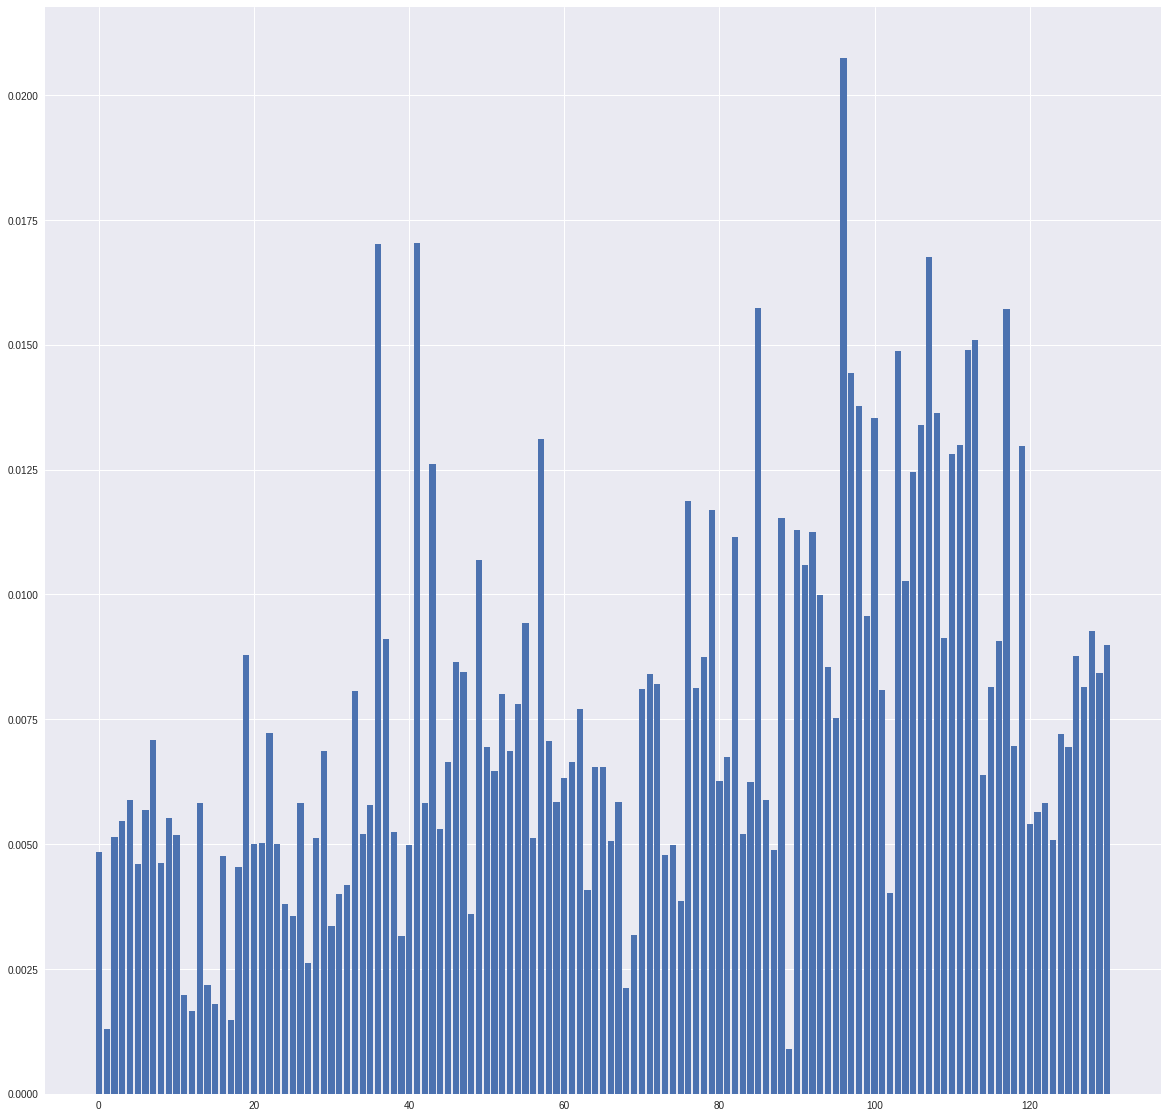

In [77]:
from matplotlib import pyplot
importance = rnd.feature_importances_
for i, v in enumerate(importance):
    print(f'Feature: {i}, Score: {round(v, 5)}')
pyplot.bar([x for x in range(len(importance))], importance)

## Градиентный бустинг

Градиентный бустинг работает последовательно добавляя в ансамбль прогнозаторы, каждый из которых корректирует своего предшественника. Гиперпараметр скорости обучения (learning_rate) устанавливает степень вклада каждого дерева. Если установить низкое значение, как 0.1, тогда придется подгонять к обучающему набору больше деревьев в ансамбле, но прогнозы обычно будут обобщаться лучше. Это прием регуляризации, называемый сжатием (shrinkage).

In [78]:
start = time.time()
grad = GradientBoostingClassifier(random_state=21, max_depth=2, n_estimators=200, learning_rate=0.1)
grad.fit(X, Y)
end_fit = time.time()
y_pred_grad = grad.predict(X_testing)
end_predict  = time.time()
print(classification_report(Y_testing, y_pred_grad))
print(f'Время обучения {round((end_fit - start), 2)} секунд')
print(f'Время прогноза {round((end_predict - end_fit), 2)} секунд')
print(f'Accuracy: {accuracy_score(Y_testing, y_pred_grad)}')
data1 = data1 + [['GradientBoostingClassifier', '(max_depth=2, n_estimators=200, learning_rate=0.1)', round(accuracy_score(Y_testing, y_pred_grad),4), 
                  round((end_fit - start), 2), round((end_predict - end_fit), 2)]]

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

Text(0.5, 1.0, 'Confusion matrix without normalization (GradientBoostingClassifier)')

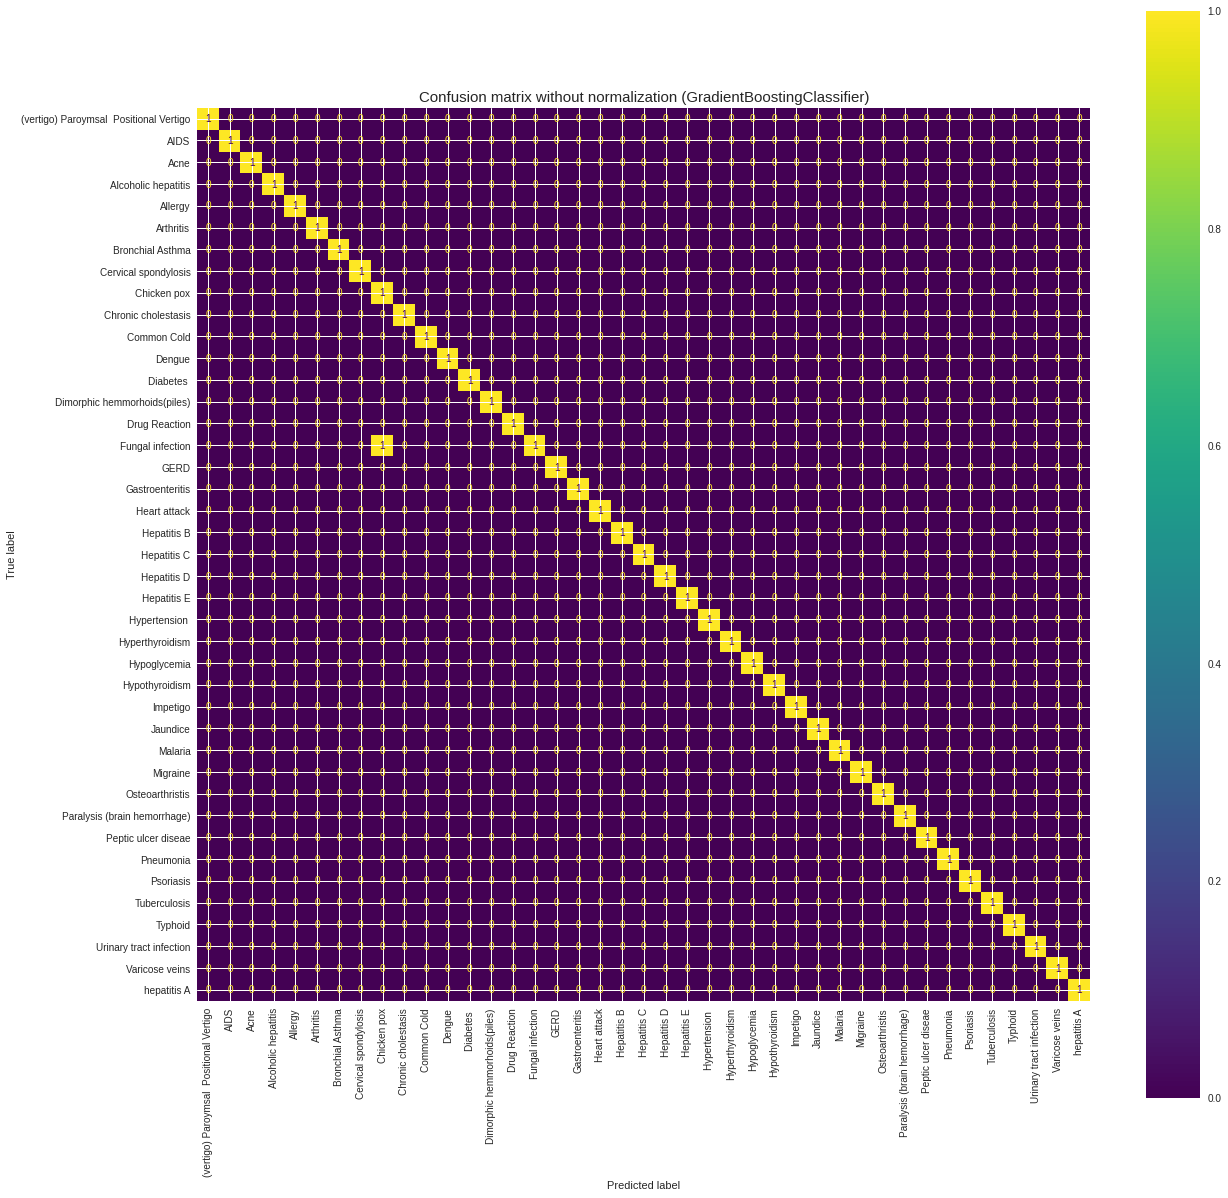

In [79]:
pylab.rcParams['figure.figsize'] = (20, 20)
disp = plot_confusion_matrix(grad, X_testing, Y_testing, xticks_rotation="vertical")
disp.ax_.set_title("Confusion matrix without normalization (GradientBoostingClassifier)", fontsize=15)

Feature: 0, Score: 0.01659
Feature: 1, Score: 0.00012
Feature: 2, Score: 0.01779
Feature: 3, Score: 0.0
Feature: 4, Score: 0.01788
Feature: 5, Score: 0.0
Feature: 6, Score: 0.0021
Feature: 7, Score: 0.00151
Feature: 8, Score: 0.00066
Feature: 9, Score: 0.02186
Feature: 10, Score: 0.00389
Feature: 11, Score: 0.00013
Feature: 12, Score: 0.00073
Feature: 13, Score: 0.02198
Feature: 14, Score: 0.00878
Feature: 15, Score: 0.0
Feature: 16, Score: 0.0
Feature: 17, Score: 0.0
Feature: 18, Score: 0.0
Feature: 19, Score: 0.00528
Feature: 20, Score: 0.0
Feature: 21, Score: 0.0
Feature: 22, Score: 0.01799
Feature: 23, Score: 0.0
Feature: 24, Score: 0.00557
Feature: 25, Score: 0.01692
Feature: 26, Score: 0.0026
Feature: 27, Score: 0.0117
Feature: 28, Score: 0.01743
Feature: 29, Score: 0.02167
Feature: 30, Score: 0.00011
Feature: 31, Score: 8e-05
Feature: 32, Score: 0.00256
Feature: 33, Score: 0.0116
Feature: 34, Score: 0.02659
Feature: 35, Score: 0.0005
Feature: 36, Score: 0.02655
Feature: 37, Scor

<BarContainer object of 131 artists>

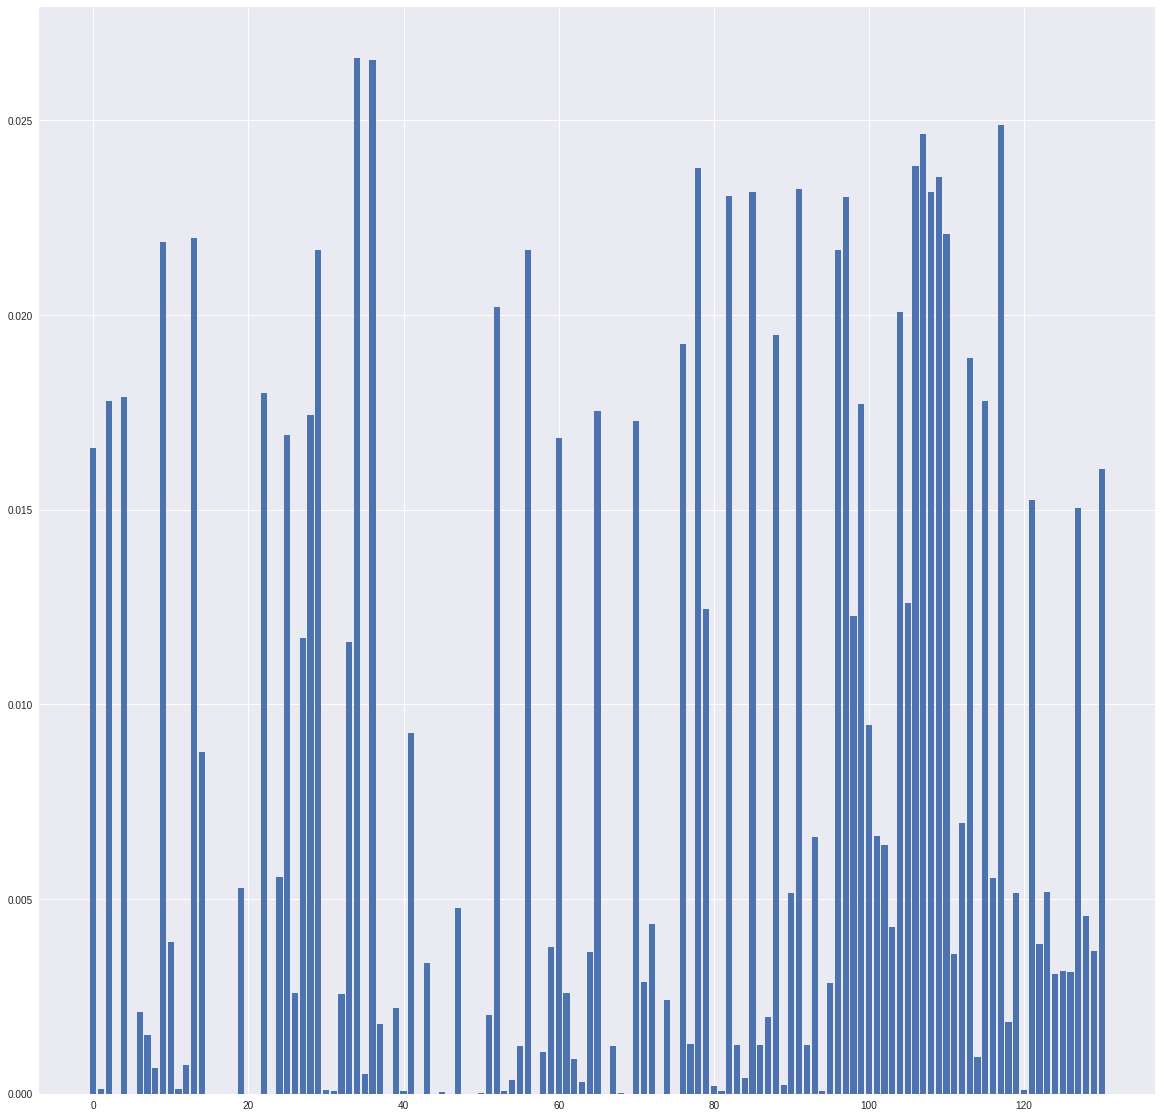

In [80]:
importance = grad.feature_importances_
for i, v in enumerate(importance):
    print(f'Feature: {i}, Score: {round(v, 5)}')
pyplot.bar([x for x in range(len(importance))], importance)

# Нейронная сеть

In [81]:
from sklearn.neural_network import MLPClassifier
import keras
from keras.layers import Dense
from keras.models import Sequential, Model
from keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import plot_model

In [82]:
label = LabelEncoder()
Y_label = label.fit_transform(Y.values)

In [83]:
Y_label.shape

(4920,)

In [84]:
encoder = OneHotEncoder()
Y_OHE = encoder.fit_transform(Y_label.reshape(-1,1))

In [85]:
Y_t = Y_OHE.toarray()

## Multi-layer Perceptron

In [86]:
start = time.time()
mlp = MLPClassifier(random_state=21, solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2))
mlp.fit(X, Y)
end_fit = time.time()
y_pred_mlp = mlp.predict(X_testing)
end_predict  = time.time()
print(classification_report(Y_testing, y_pred_mlp))
print(f'Время обучения {round((end_fit - start), 2)} секунд')
print(f'Время прогноза {round((end_predict - end_fit), 2)} секунд')
print(f'Accuracy: {accuracy_score(Y_testing, y_pred_mlp)}')
data1 = data1 + [['MultiLayerPerceptronClassifier', '(solver=lbfgs, alpha=1e-5, hidden_layer_sizes=(5,2))', round(accuracy_score(Y_testing, y_pred_mlp),4), 
                  round((end_fit - start), 2), round((end_predict - end_fit), 2)]]

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.00      0.00      0.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       0.00      0.00      0.00         1
                                Allergy       0.00      0.00      0.00         1
                              Arthritis       0.05      1.00      0.09         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       0.00      0.00      0.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       0.00      0.00      0.00         1
                            Common Cold       0.00      0.00      0.00         1
                           

Text(0.5, 1.0, 'Confusion matrix without normalization (Multi-Layer Perceptron)')

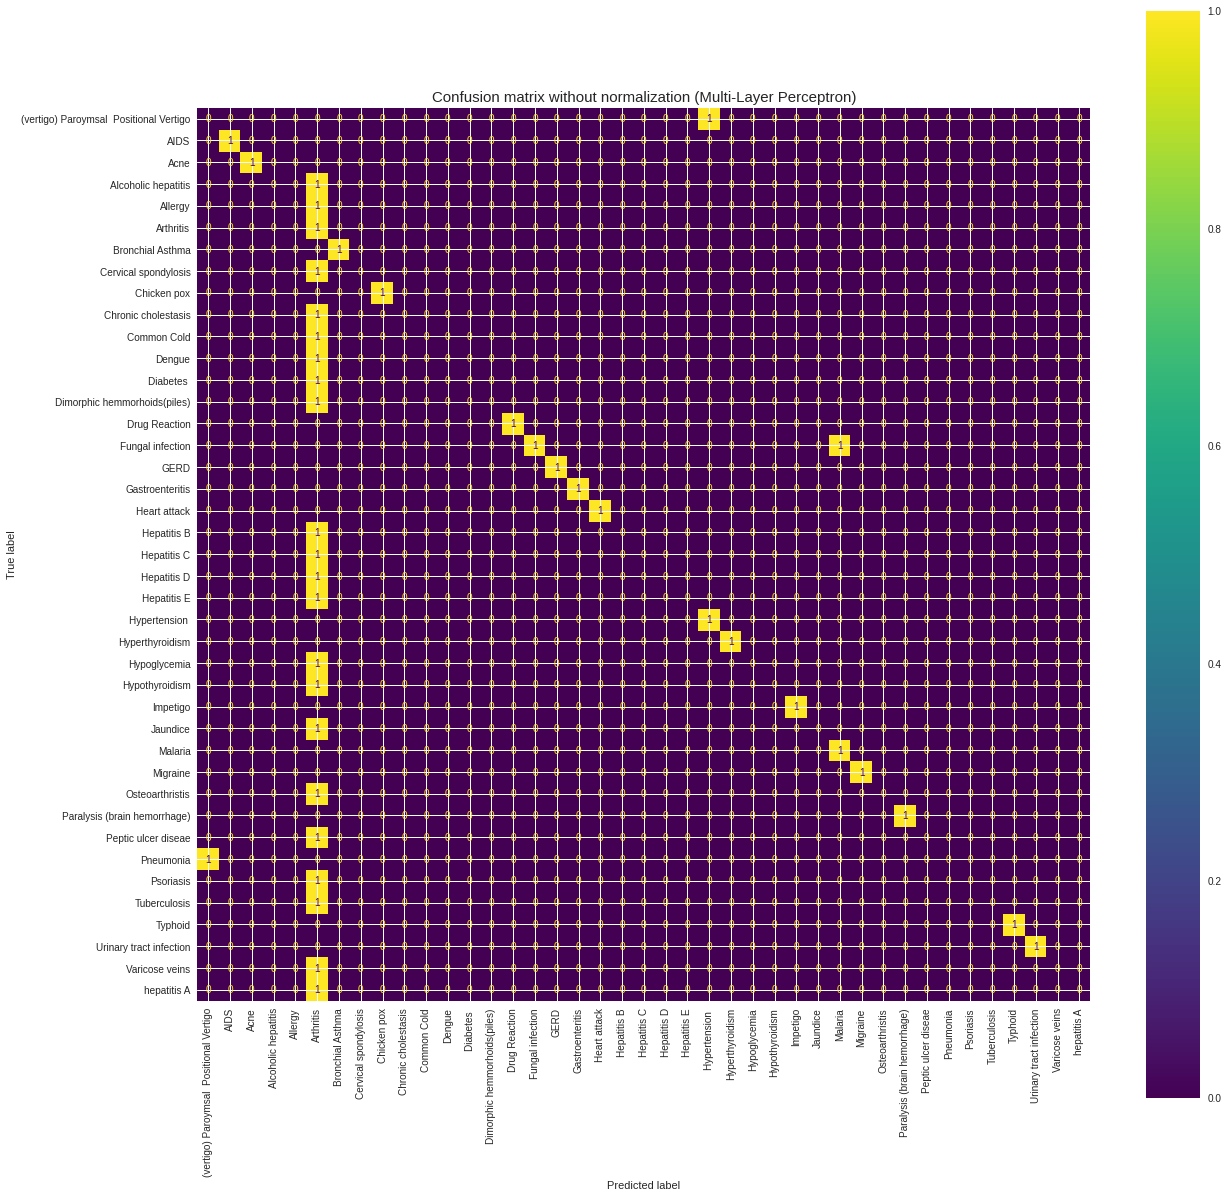

In [87]:
pylab.rcParams['figure.figsize'] = (20, 20)
disp = plot_confusion_matrix(mlp, X_testing, Y_testing, xticks_rotation="vertical")
disp.ax_.set_title("Confusion matrix without normalization (Multi-Layer Perceptron)", fontsize=15)

In [88]:
start = time.time()
mlp = MLPClassifier(random_state=21, solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(512,64))
mlp.fit(X, Y)
end_fit = time.time()
y_pred_mlp = mlp.predict(X_testing)
end_predict  = time.time()
print(classification_report(Y_testing, y_pred_mlp))
print(f'Время обучения {round((end_fit - start), 2)} секунд')
print(f'Время прогноза {round((end_predict - end_fit), 2)} секунд')
print(f'Accuracy: {accuracy_score(Y_testing, y_pred_mlp)}')
data1 = data1 + [['MultiLayerPerceptronClassifier', '(solver=lbfgs, alpha=1e-5, hidden_layer_sizes=(512,64))', round(accuracy_score(Y_testing, y_pred_mlp),4), 
                  round((end_fit - start), 2), round((end_predict - end_fit), 2)]]

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

Text(0.5, 1.0, 'Confusion matrix without normalization (Multi-Layer Perceptron)')

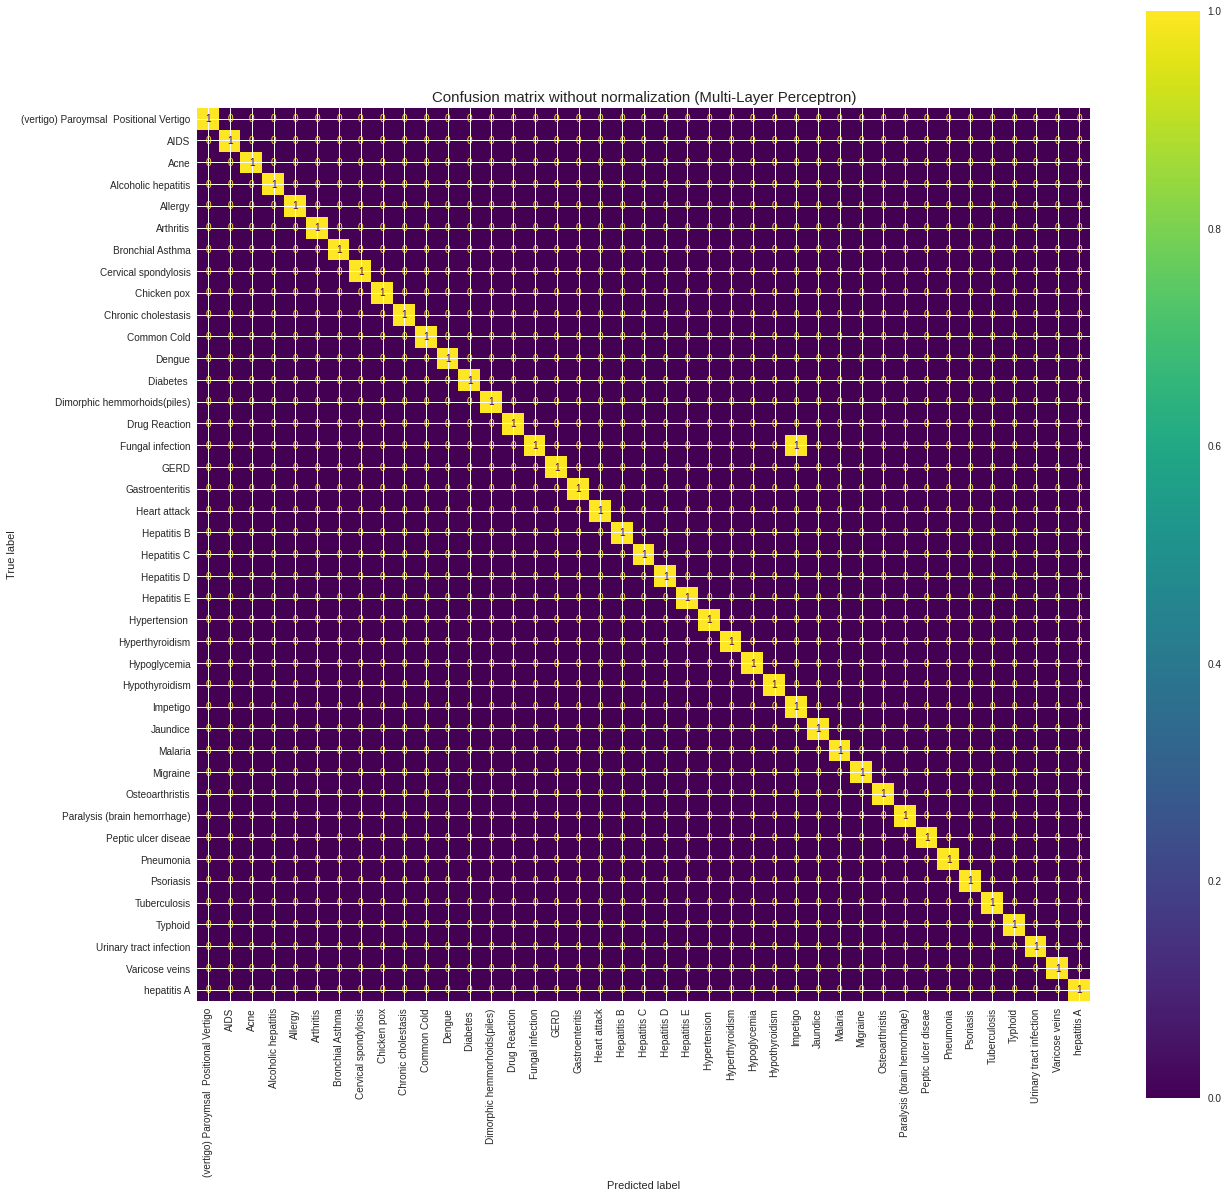

In [89]:
pylab.rcParams['figure.figsize'] = (20, 20)
disp = plot_confusion_matrix(mlp, X_testing, Y_testing, xticks_rotation="vertical")
disp.ax_.set_title("Confusion matrix without normalization (Multi-Layer Perceptron)", fontsize=15)

## Dense сеть без Dropout

In [90]:
start = time.time()
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X.shape[1], )))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(Y_t.shape[1], activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               16896     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 41)                1353      
                                                                 
Total params: 28,585
Trainable params: 28,585
Non-trainable params: 0
_________________________________________________________________


In [91]:
# компилируем
model.compile(optimizer=RMSprop(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [92]:
history = model.fit(X,
                    Y_t,
                    epochs=30,
                    batch_size=16,
                    validation_split=0.2)
end_fit = time.time()

Epoch 1/30
246/246 [==============================] - 2s 3ms/step - loss: 1.2068 - accuracy: 0.8143 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 2/30
246/246 [==============================] - 1s 2ms/step - loss: 0.0037 - accuracy: 0.9997 - val_loss: 3.9454e-05 - val_accuracy: 1.0000
Epoch 3/30
246/246 [==============================] - 1s 3ms/step - loss: 1.9666e-04 - accuracy: 1.0000 - val_loss: 5.9314e-07 - val_accuracy: 1.0000
Epoch 4/30
246/246 [==============================] - 1s 3ms/step - loss: 3.2608e-05 - accuracy: 1.0000 - val_loss: 5.8151e-08 - val_accuracy: 1.0000
Epoch 5/30
246/246 [==============================] - 1s 2ms/step - loss: 2.2887e-06 - accuracy: 1.0000 - val_loss: 2.9075e-09 - val_accuracy: 1.0000
Epoch 6/30
246/246 [==============================] - 1s 3ms/step - loss: 3.4534e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/30
246/246 [==============================] - 1s 3ms/step - loss: 3.0680e-08 - accuracy: 1.0000 - val_lo

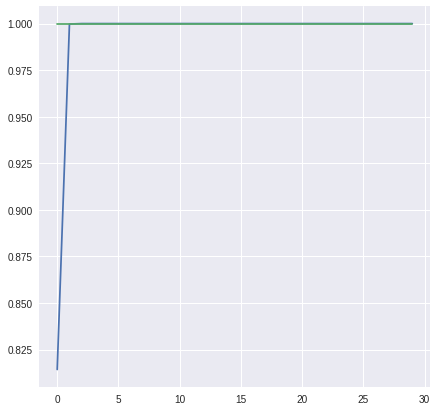

In [93]:
# выводим график точности распознавания на обучающей и проверочной выборках
pylab.rcParams['figure.figsize'] = (7, 7)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

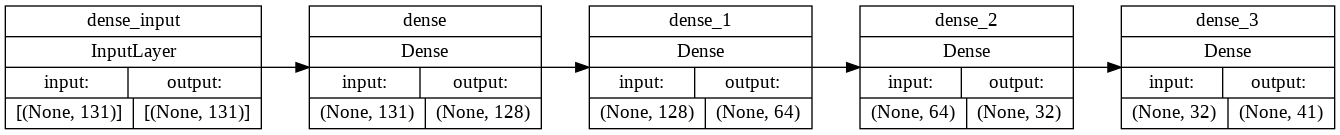

In [94]:
plot_model(model, show_shapes=True, rankdir='LR', dpi=96)

In [95]:
print('Точность на обучающей выборке ', round(history.history['accuracy'][29],3))
print('Точность на проверочной выборке ',round(history.history['val_accuracy'][29],3))

Точность на обучающей выборке  1.0
Точность на проверочной выборке  1.0


In [96]:
print(f'Время обучения {round((end_fit - start), 2)} секунд')

Время обучения 26.44 секунд


In [97]:
label = LabelEncoder()
Y_label_testing = label.fit_transform(Y_testing.values)
encoder = OneHotEncoder()
Y_OHE_testing = encoder.fit_transform(Y_label_testing.reshape(-1,1))
Y_testing = Y_OHE_testing.toarray()

In [98]:
start_predict = time.time()
print('Точность на обучающей выборке ', round(model.evaluate(X, Y_t, verbose=0)[1],3))
print('Точность на тестовой выборке ', round(model.evaluate(X_testing, Y_testing, verbose=0)[1],3))
end_predict  = time.time()
print(f'Время прогноза {round((end_predict - start_predict), 2)} секунд')

Точность на обучающей выборке  1.0
Точность на тестовой выборке  0.976
Время прогноза 0.53 секунд


In [99]:
data1 = data1 + [['3 Dense layers', '(neurons = 128,64,32, activation=relu, batch_size=16, 30 epochs)', round(model.evaluate(X_testing, Y_testing, verbose=0)[1],4), 
                  round((end_fit - start), 2), round((end_predict - start_predict), 2)]]

Полносвязная сеть с двумя внутренними слоями, оптимизатор - Адам, увеличен размер батча

In [100]:
start = time.time()
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1], )))
# model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(Y_t.shape[1], activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                8448      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 41)                1353      
                                                                 
Total params: 11,881
Trainable params: 11,881
Non-trainable params: 0
_________________________________________________________________


In [101]:
# компилируем
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [102]:
history = model.fit(X,
                    Y_t,
                    epochs=30,
                    batch_size=160,
                    validation_split=0.2)
end_fit = time.time()

Epoch 1/30
25/25 [==============================] - 1s 13ms/step - loss: 3.5308 - accuracy: 0.1738 - val_loss: 3.2856 - val_accuracy: 0.4390
Epoch 2/30
25/25 [==============================] - 0s 5ms/step - loss: 3.0709 - accuracy: 0.5950 - val_loss: 2.6429 - val_accuracy: 0.7073
Epoch 3/30
25/25 [==============================] - 0s 5ms/step - loss: 2.3236 - accuracy: 0.7985 - val_loss: 1.7136 - val_accuracy: 0.9268
Epoch 4/30
25/25 [==============================] - 0s 5ms/step - loss: 1.4183 - accuracy: 0.9294 - val_loss: 0.8393 - val_accuracy: 0.9512
Epoch 5/30
25/25 [==============================] - 0s 5ms/step - loss: 0.6886 - accuracy: 0.9842 - val_loss: 0.3207 - val_accuracy: 1.0000
Epoch 6/30
25/25 [==============================] - 0s 4ms/step - loss: 0.3000 - accuracy: 1.0000 - val_loss: 0.1248 - val_accuracy: 1.0000
Epoch 7/30
25/25 [==============================] - 0s 4ms/step - loss: 0.1432 - accuracy: 1.0000 - val_loss: 0.0569 - val_accuracy: 1.0000
Epoch 8/30
25/25 [=

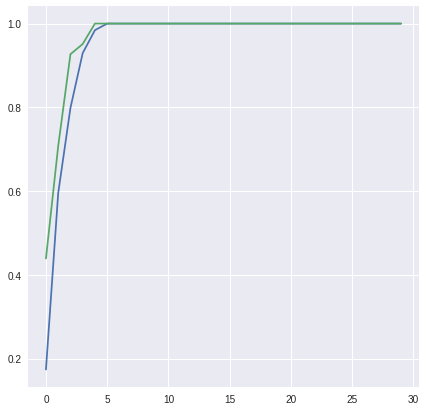

In [103]:
# выводим график точности распознавания на обучающей и проверочной выборках
pylab.rcParams['figure.figsize'] = (7, 7)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

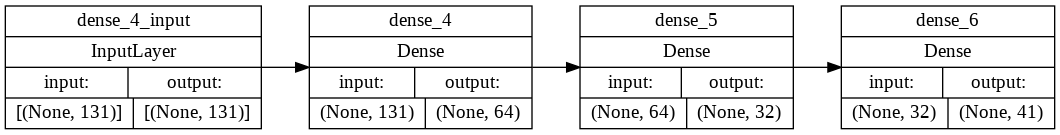

In [104]:
plot_model(model, show_shapes=True, rankdir='LR', dpi=96)

In [105]:
print('Точность на обучающей выборке ', round(history.history['accuracy'][29],3))
print('Точность на проверочной выборке ',round(history.history['val_accuracy'][29],3))

Точность на обучающей выборке  1.0
Точность на проверочной выборке  1.0


In [106]:
print(f'Время обучения {round((end_fit - start), 2)} секунд')

Время обучения 13.76 секунд


In [107]:
start_predict = time.time()
print('Точность на обучающей выборке ', round(model.evaluate(X, Y_t, verbose=0)[1],3))
print('Точность на тестовой выборке ', round(model.evaluate(X_testing, Y_testing, verbose=0)[1],3))
end_predict  = time.time()
print(f'Время прогноза {round((end_predict - start_predict), 2)} секунд')

Точность на обучающей выборке  1.0
Точность на тестовой выборке  0.976
Время прогноза 0.51 секунд


In [108]:
data1 = data1 + [['2 Dense layers', '(neurons = 64,32, activation=relu, batch_size=160, 30 epochs, opt=Adam)', round(model.evaluate(X_testing, Y_testing, verbose=0)[1],4), 
                  round((end_fit - start), 2), round((end_predict - start_predict), 2)]]

## Dense сеть с Dropout

Epoch 1/30
123/123 [==============================] - 1s 5ms/step - loss: 3.6909 - accuracy: 0.0391 - val_loss: 3.6269 - val_accuracy: 0.1220
Epoch 2/30
123/123 [==============================] - 0s 3ms/step - loss: 3.6161 - accuracy: 0.0859 - val_loss: 3.5139 - val_accuracy: 0.3171
Epoch 3/30
123/123 [==============================] - 0s 3ms/step - loss: 3.5083 - accuracy: 0.1489 - val_loss: 3.3583 - val_accuracy: 0.4390
Epoch 4/30
123/123 [==============================] - 0s 3ms/step - loss: 3.3829 - accuracy: 0.1969 - val_loss: 3.1615 - val_accuracy: 0.6341
Epoch 5/30
123/123 [==============================] - 1s 4ms/step - loss: 3.2129 - accuracy: 0.2515 - val_loss: 2.9185 - val_accuracy: 0.7561
Epoch 6/30
123/123 [==============================] - 0s 3ms/step - loss: 3.0101 - accuracy: 0.3209 - val_loss: 2.6360 - val_accuracy: 0.8049
Epoch 7/30
123/123 [==============================] - 0s 3ms/step - loss: 2.7832 - accuracy: 0.3707 - val_loss: 2.3302 - val_accuracy: 0.8537
Epoch 

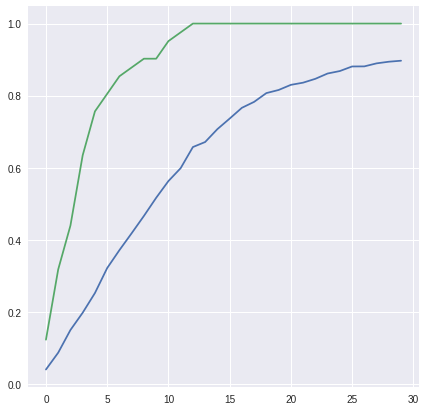

In [109]:
# добавим Dropout
start = time.time()
modelD = Sequential()
modelD.add(Dense(128, activation='relu', input_shape=(X.shape[1], )))
modelD.add(Dropout(0.25))
modelD.add(Dense(64, activation='relu'))
modelD.add(Dropout(0.25))
modelD.add(Dense(32, activation='relu'))
modelD.add(Dropout(0.25))

modelD.add(Dense(Y_t.shape[1], activation='softmax'))

# компилируем
modelD.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = modelD.fit(X,
                    Y_t,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.2)
end_fit = time.time()
# выводим график точности распознавания на обучающей и проверочной выборках
# pylab.rcParams['figure.figsize'] = (7, 7)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [110]:
modelD.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               16896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 41)               

In [111]:
print('Точность на обучающей выборке ', round(history.history['accuracy'][29],3))
print('Точность на проверочной выборке ',round(history.history['val_accuracy'][29],3))

Точность на обучающей выборке  0.897
Точность на проверочной выборке  1.0


In [112]:
print(f'Время обучения {round((end_fit - start), 2)} секунд')

Время обучения 21.47 секунд


In [113]:
start_predict = time.time()
print('Точность на обучающей выборке ', round(modelD.evaluate(X, Y_t, verbose=0)[1],3))
print('Точность на тестовой выборке ', round(modelD.evaluate(X_testing, Y_testing, verbose=0)[1],3))
end_predict  = time.time()
print(f'Время прогноза {round((end_predict - start_predict), 2)} секунд')

Точность на обучающей выборке  1.0
Точность на тестовой выборке  0.976
Время прогноза 0.51 секунд


In [114]:
data1 = data1 + [['3 Dense layers + Dropout', '(neurons = 128,64,32, activation=relu, batch_size=32, 30 epochs)', round(modelD.evaluate(X_testing, Y_testing, verbose=0)[1],4), 
                  round((end_fit - start), 2), round((end_predict - start_predict), 2)]]

Epoch 1/10
123/123 [==============================] - 1s 6ms/step - loss: 0.3832 - accuracy: 0.9004 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 2/10
123/123 [==============================] - 0s 4ms/step - loss: 0.3629 - accuracy: 0.9123 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 3/10
123/123 [==============================] - 0s 3ms/step - loss: 0.3677 - accuracy: 0.9060 - val_loss: 0.0168 - val_accuracy: 1.0000
Epoch 4/10
123/123 [==============================] - 0s 3ms/step - loss: 0.3701 - accuracy: 0.9002 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 5/10
123/123 [==============================] - 0s 3ms/step - loss: 0.3571 - accuracy: 0.9088 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 6/10
123/123 [==============================] - 0s 4ms/step - loss: 0.3716 - accuracy: 0.9055 - val_loss: 0.0160 - val_accuracy: 1.0000
Epoch 7/10
123/123 [==============================] - 0s 3ms/step - loss: 0.3680 - accuracy: 0.9083 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 

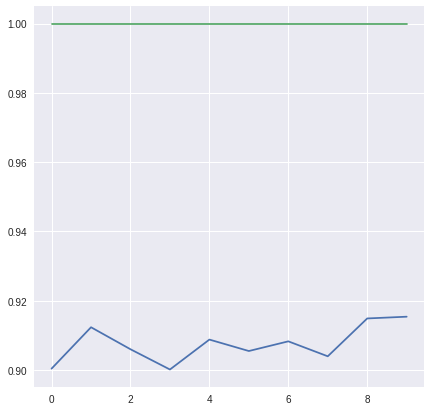

Время обучения 5.24 секунд


In [115]:
# скомпилируем и дообучим модель с меньшим шагом
# обучение с меньшим шагом - неудачная попытка, точность падает
start2 = time.time()
modelD.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = modelD.fit(X,
                    Y_t,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)
# выводим график точности распознавания на обучающей и проверочной выборках
end_fit2 = time.time()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()
print(f'Время обучения {round((end_fit2 - start2), 2)} секунд')

## Dense сеть c Dropout, BatchNormalization

Epoch 1/30
32/32 [==============================] - 2s 16ms/step - loss: 3.8635 - accuracy: 0.0501 - val_loss: 3.6068 - val_accuracy: 0.0976
Epoch 2/30
32/32 [==============================] - 0s 9ms/step - loss: 3.2173 - accuracy: 0.1387 - val_loss: 3.4804 - val_accuracy: 0.0976
Epoch 3/30
32/32 [==============================] - 0s 9ms/step - loss: 2.6986 - accuracy: 0.2848 - val_loss: 3.3202 - val_accuracy: 0.2439
Epoch 4/30
32/32 [==============================] - 0s 9ms/step - loss: 2.3315 - accuracy: 0.4256 - val_loss: 3.1127 - val_accuracy: 0.3659
Epoch 5/30
32/32 [==============================] - 0s 9ms/step - loss: 1.9861 - accuracy: 0.5694 - val_loss: 2.8617 - val_accuracy: 0.5122
Epoch 6/30
32/32 [==============================] - 0s 10ms/step - loss: 1.7316 - accuracy: 0.6908 - val_loss: 2.5725 - val_accuracy: 0.7073
Epoch 7/30
32/32 [==============================] - 0s 9ms/step - loss: 1.5225 - accuracy: 0.7642 - val_loss: 2.2516 - val_accuracy: 0.9268
Epoch 8/30
32/32 [

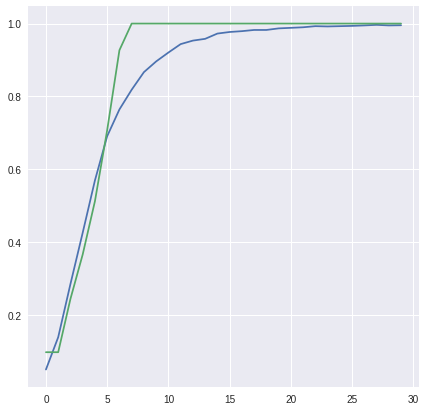

Время обучения 10.26 секунд


In [116]:
# добавим Dropout
start = time.time()
modelB = Sequential()
modelB.add(Dense(256, activation='relu', input_shape=(X.shape[1], )))
modelB.add(Dropout(0.25))
modelB.add(BatchNormalization())

modelB.add(Dense(128, activation='relu'))
modelB.add(Dropout(0.25))
modelB.add(BatchNormalization())

modelB.add(Dense(64, activation='relu'))
modelB.add(Dropout(0.25))
modelB.add(BatchNormalization())

modelB.add(Dense(41, activation='softmax'))

# компилируем
modelB.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = modelB.fit(X,
                    Y_t,
                    epochs=30,
                    batch_size=123,
                    validation_split=0.2)
# выводим график точности распознавания на обучающей и проверочной выборках
end_fit = time.time()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()
print(f'Время обучения {round((end_fit - start), 2)} секунд')

In [117]:
modelB.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 256)               33792     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                      

In [118]:
print('Точность на обучающей выборке ', round(history.history['accuracy'][29],3))
print('Точность на проверочной выборке ',round(history.history['val_accuracy'][29],3))

Точность на обучающей выборке  0.995
Точность на проверочной выборке  1.0


In [119]:
start_predict  = time.time()
print('Точность на обучающей выборке ', round(modelB.evaluate(X, Y_t, verbose=0)[1],3))
print('Точность на тестовой выборке ', round(modelB.evaluate(X_testing, Y_testing, verbose=0)[1],3))
end_predict  = time.time()
print(f'Время прогноза {round((end_predict - start_predict), 2)} секунд')

Точность на обучающей выборке  1.0
Точность на тестовой выборке  0.976
Время прогноза 0.75 секунд


In [120]:
data1 = data1 + [['3 Dense layers + Dropout + BatchNormalization', '(neurons = 256,128,64, activation=relu, batch_size=123, 30 epochs)', round(modelB.evaluate(X_testing, Y_testing, verbose=0)[1],4), 
                  round((end_fit - start), 2), round((end_predict - start_predict), 2)]]

Полносвязная сеть с двумя внутренними слоями (16 и 8 нейронов), оптимизатор - Адам, увеличен размер батча

In [121]:
start = time.time()
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X.shape[1], )))

model.add(Dense(8, activation='relu'))

model.add(Dense(Y_t.shape[1], activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                2112      
                                                                 
 dense_16 (Dense)            (None, 8)                 136       
                                                                 
 dense_17 (Dense)            (None, 41)                369       
                                                                 
Total params: 2,617
Trainable params: 2,617
Non-trainable params: 0
_________________________________________________________________


In [122]:
# компилируем
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [123]:
history = model.fit(X,
                    Y_t,
                    epochs=20,
                    batch_size=100,
                    validation_split=0.2)
end_fit = time.time()

Epoch 1/20
40/40 [==============================] - 1s 10ms/step - loss: 3.6397 - accuracy: 0.0727 - val_loss: 3.5295 - val_accuracy: 0.1463
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 3.4341 - accuracy: 0.1535 - val_loss: 3.2491 - val_accuracy: 0.2195
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 3.1054 - accuracy: 0.2172 - val_loss: 2.8248 - val_accuracy: 0.3171
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 2.6589 - accuracy: 0.3539 - val_loss: 2.3229 - val_accuracy: 0.4878
Epoch 5/20
40/40 [==============================] - 0s 4ms/step - loss: 2.1718 - accuracy: 0.5658 - val_loss: 1.8218 - val_accuracy: 0.6585
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 1.6984 - accuracy: 0.7101 - val_loss: 1.3586 - val_accuracy: 0.7805
Epoch 7/20
40/40 [==============================] - 0s 3ms/step - loss: 1.2784 - accuracy: 0.7967 - val_loss: 0.9744 - val_accuracy: 0.8537
Epoch 8/20
40/40 [=

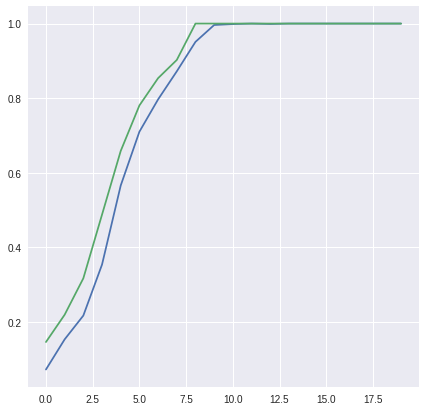

In [124]:
# выводим график точности распознавания на обучающей и проверочной выборках
pylab.rcParams['figure.figsize'] = (7, 7)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

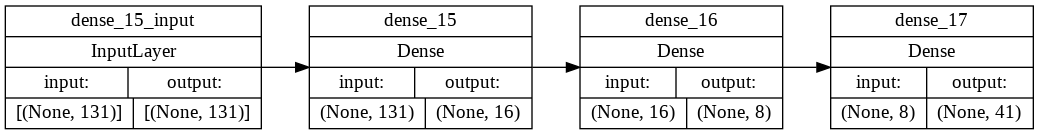

In [125]:
plot_model(model, show_shapes=True, rankdir='LR', dpi=96)

In [126]:
print('Точность на обучающей выборке ', round(history.history['accuracy'][19],3))
print('Точность на проверочной выборке ',round(history.history['val_accuracy'][19],3))

Точность на обучающей выборке  1.0
Точность на проверочной выборке  1.0


In [127]:
print(f'Время обучения {round((end_fit - start), 2)} секунд')

Время обучения 11.82 секунд


In [128]:
start_predict = time.time()
print('Точность на обучающей выборке ', round(model.evaluate(X, Y_t, verbose=0)[1],3))
print('Точность на тестовой выборке ', round(model.evaluate(X_testing, Y_testing, verbose=0)[1],3))
end_predict  = time.time()
print(f'Время прогноза {round((end_predict - start_predict), 2)} секунд')

Точность на обучающей выборке  1.0
Точность на тестовой выборке  0.976
Время прогноза 0.41 секунд


In [129]:
data1 = data1 + [['2 Dense layers', '(neurons = 16,8, activation=relu, batch_size=100, 20 epochs, opt=Adam)', round(model.evaluate(X_testing, Y_testing, verbose=0)[1],4), 
                  round((end_fit - start), 2), round((end_predict - start_predict), 2)]]

Сводная таблица результатов:

In [ ]:
df1 = pd.DataFrame(data1, columns=['Classification Model', 'Parameters', 'Accuracy', 'Training time (sec)', 'Prediction time (sec)'])

In [152]:
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)
df1

Classification Model                                                               Parameters  Accuracy  Training time (sec)  Prediction time (sec)
0                              LogisticRegression                                          (multi_class=multinomial, C=10)    1.0000                 2.26                   0.00
1                              LogisticRegression                                         (multi_class=multinomial, C=0.2)    1.0000                 1.55                   0.01
2                                       LinearSVC                                                        (C=1, loss=hinge)    0.9762                22.49                   0.00
3                                       LinearSVC                                                                   (C=10)    0.9762                20.95                   0.00
4                                             SVC                                                     (kernel=linear, C=1)    0.9762                 0.18                   0.00
5                                             SVC                                                    (kernel=linear, C=10)    0.9762                 0.17                   0.00
6                                             SVC                                    (kernel=poly, degree=3, coef0=1, C=5)    0.9762                 0.21                   0.00
7                                             SVC                                  (kernel=poly, degree=20, coef0=1, C=20)    0.9762                 0.23                   0.00
8                                             SVC                                           (kernel=rbf, gamma=5, C=0.001)    0.9762                 4.31                   0.06
9                                             SVC                                          (kernel=rbf, gamma=0.1, C=1000)    0.9762                 0.38                   0.01
10                                            SVC                                                   (kernel=sigmoid, C=50)    0.9762                 0.26                   0.00
11                       BaggingC (DecisionTreeC)                      (n_estimators=700, max_samples=200, bootstrap=True)    0.9762                 6.56                   0.58
12                         DecisionTreeClassifier                                                           (max_depth=30)    0.7857                 0.06                   0.00
13                         DecisionTreeClassifier                                                          (max_depth=150)    0.9762                 0.06                   0.00
14                         RandomForestClassifier                                    (n_estimators=500, max_leaf_nodes=20)    0.9762                 2.23                   0.21
15                     GradientBoostingClassifier                       (max_depth=2, n_estimators=200, learning_rate=0.1)    0.9762                83.78                   0.01
16                 MultiLayerPerceptronClassifier                     (solver=lbfgs, alpha=1e-5, hidden_layer_sizes=(5,2))    0.4286                 5.16                   0.01
17                 MultiLayerPerceptronClassifier                  (solver=lbfgs, alpha=1e-5, hidden_layer_sizes=(512,64))    0.9762                 6.24                   0.01
18                                 3 Dense layers         (neurons = 128,64,32, activation=relu, batch_size=16, 30 epochs)    0.9762                26.44                   0.53
19                                 2 Dense layers  (neurons = 64,32, activation=relu, batch_size=160, 30 epochs, opt=Adam)    0.9762                13.76                   0.51
20                       3 Dense layers + Dropout         (neurons = 128,64,32, activation=relu, batch_size=32, 30 epochs)    0.9762                21.47                   0.51
21  3 Dense layers + Dropout + BatchNormalization       (neurons = 256,128,64, activation=relu, batch_size=123, 30 epochs)    0.9762   

# Резюме
*  Наилучшие результаты показала логистическая регрессия (высокая точность на тестовой выборке при небольшом времени обучения). 
*  Модели на основе метода опорных векторов показали на тестовой выборке немного ниже точность 0,9762, причем одинаковую независимо от ядра и других гиперпараметров. 
*  У модели на основе дерева решений значительно ухудшается точность при уменьшении глубины. 
*   Ансамблевые классификаторы: случайные леса и градиентный бустинг также показывают точность на тестовой выборке около 0,9762 (при значительном количестве классификаторов 200-700).
*   Многослойный персептрон достигает такой точности на тестовой выборке при скрытых слоях на 512 и 64 нейрона. Небольшое количество нейронов на скрытых слоях значительно (в два раза) уменьшает точность.
*   Полагаю, что увеличение количества внутренних полносвязных слоев и количества нейронов в нейронной сети быстро переобучает модель при таком датасете. Помогает снизить переобучение добавление слоев Dropout и BatchNormalization.
*   Усложнение архитектуры нейронной сети не всегда улучшает результат.
*   Полносвязная модель с двумя внутренними слоями на 16 и 8 нейронов дает неплохой результат на тестовой выборке.

Смотри сводную таблицу результатов.











Используемая при анализе данных и изучении моделей классификаторов и нейронных сетей литература:


1.   Документация библиотеки Scikit-Learn https://scikit-learn.org/stable/index.html
2.   Орельен Жерон "Прикладное машинное обучение с помощью Scikit-Learn и TensorFlow: концепции, инструменты и техники для создания интеллектуальных систем."

